The LHC collides bunches of protons every 50 nanoseconds within each of its four experiments, each crossing producing a random number of proton-proton collisions (with a Poisson expectation between 10 and 35, depending on the LHC parameters) called events8. Two colliding protons produce a small firework in which part of the kinetic energy of the protons is converted into new particles. Most of the resulting particles are very unstable and decay quickly into a cascade of lighter particles.

Based on these properties, the properties of the decayed parent particle are inferred, and the inference chain is continued until reaching the heaviest primary particles. given the elusive nature of neutrinos, their minuscule mass, and the way they oscillate between flavors, one could very well imagine that the mass of leptons comes from an entirely different mechanism. Hence the importance of measuring as precisely as possible the coupling of the Higgs to tau arises.

Particle colliders enable us to probe the fundamental nature of matter by observing exotic particles produced by high-energy collisions. Because the experimental measurements from these collisions are necessarily incomplete and imprecise, machine learning algorithms play a major role in the analysis of experimental data. The high-energy physics community typically relies on standardized machine learning software packages for this analysis and devotes substantial effort towards improving statistical power by hand-crafting high-level features derived from the raw collider measurements.

With the given dataset, **we have to classify whether the given event was a signal or a background noise in the process of decay for Higgs particle acceleration.**


In [333]:
print("      ")

Import the required libraries

In [292]:
#Data pre-processing
import pandas as pd
import numpy as np

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

#Pre-processing
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

#Imputer
# import the KNNimputer class
from sklearn.impute import KNNImputer

#Models
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

#ANN
import tensorflow as tf 
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

#Evaluation
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, precision_score, recall_score

#Oversampling
from imblearn.over_sampling import SMOTE

#Misc
from collections import Counter
import math

pd.set_option('display.max_rows', 250)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

2.10.0


Read the dataset

In [3]:
data = pd.read_csv('Dataset/training.csv')
print(f"Number of data points {data.shape[0]}")
print(f"Number of features    {data.shape[1]}")

Number of data points 250000
Number of features    33


In [4]:
data.head()

EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0   100000       138.470                       51.655        97.827    27.980   
1   100001       160.937                       68.768       103.235    48.146   
2   100002      -999.000                      162.172       125.953    35.635   
3   100003       143.905                       81.417        80.943     0.414   
4   100004       175.864                       16.915       134.805    16.405   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.91           124.711                2.666   
1               -999.00          -999.000             -999.000   
2               -999.00          -999.000             -999.000   
3               -999.00          -999.000             -999.000   
4               -999.00          -999.000             -999.000   

   DER_deltar_tau_lep  DER_pt_tot  ...  PRI_jet_num  PRI_jet_leading_pt  \
0               3.064      41.928  ...            2              67.435   
1               3.473       2.078  ...            1              46.226   
2               3.148       9.336  ...            1              44.251   
3               3.310       0.414  ...            0            -999.000   
4               3.891      16.405  ...            0            -999.000   

   PRI_jet_leading_eta  PRI_jet_leading_phi  PRI_jet_subleading_pt  \
0                2.150                0.444                 46.062   
1                0.725                1.158               -999.000   
2                2.053               -2.028               -999.000   
3             -999.000             -999.000               -999.000   
4             -999.000             -999.000               -999.000   

   PRI_jet_subleading_eta  PRI_jet_subleading_phi  PRI_jet_all_pt    Weight  \
0                    1.24                  -2.475         113.497  0.002653   
1                 -999.00                -999.000          46.226  2.233584   
2                 -999.00                -999.000          44.251  2.347389   
3                 -999.00                -999.000          -0.000  5.446378   
4                 -999.00                -999.000           0.000  6.245333   

   Label  
0      s  
1      b  
2      b  
3      b  
4      b  

[5 rows x 33 columns]

Descriptive stats on Dataset

In [5]:
data.describe().T

count           mean           std  \
EventId                      250000.0  224999.500000  72168.927986   
DER_mass_MMC                 250000.0     -49.023079    406.345647   
DER_mass_transverse_met_lep  250000.0      49.239819     35.344886   
DER_mass_vis                 250000.0      81.181982     40.828691   
DER_pt_h                     250000.0      57.895962     63.655682   
DER_deltaeta_jet_jet         250000.0    -708.420675    454.480565   
DER_mass_jet_jet             250000.0    -601.237051    657.972302   
DER_prodeta_jet_jet          250000.0    -709.356603    453.019877   
DER_deltar_tau_lep           250000.0       2.373100      0.782911   
DER_pt_tot                   250000.0      18.917332     22.273494   
DER_sum_pt                   250000.0     158.432217    115.706115   
DER_pt_ratio_lep_tau         250000.0       1.437609      0.844743   
DER_met_phi_centrality       250000.0      -0.128305      1.193585   
DER_lep_eta_centrality       250000.0    -708.985189    453.596721   
PRI_tau_pt                   250000.0      38.707419     22.412081   
PRI_tau_eta                  250000.0      -0.010973      1.214079   
PRI_tau_phi                  250000.0      -0.008171      1.816763   
PRI_lep_pt                   250000.0      46.660207     22.064922   
PRI_lep_eta                  250000.0      -0.019507      1.264982   
PRI_lep_phi                  250000.0       0.043543      1.816611   
PRI_met                      250000.0      41.717235     32.894693   
PRI_met_phi                  250000.0      -0.010119      1.812223   
PRI_met_sumet                250000.0     209.797178    126.499506   
PRI_jet_num                  250000.0       0.979176      0.977426   
PRI_jet_leading_pt           250000.0    -348.329567    532.962789   
PRI_jet_leading_eta          250000.0    -399.254314    489.338286   
PRI_jet_leading_phi          250000.0    -399.259788    489.333883   
PRI_jet_subleading_pt        250000.0    -692.381204    479.875496   
PRI_jet_subleading_eta       250000.0    -709.121609    453.384624   
PRI_jet_subleading_phi       250000.0    -709.118631    453.389017   
PRI_jet_all_pt               250000.0      73.064591     98.015662   
Weight                       250000.0       1.646767      1.875103   

                                       min            25%            50%  \
EventId                      100000.000000  162499.750000  224999.500000   
DER_mass_MMC                   -999.000000      78.100750     105.012000   
DER_mass_transverse_met_lep       0.000000      19.241000      46.524000   
DER_mass_vis                      6.329000      59.388750      73.752000   
DER_pt_h                          0.000000      14.068750      38.467500   
DER_deltaeta_jet_jet           -999.000000    -999.000000    -999.000000   
DER_mass_jet_jet               -999.000000    -999.000000    -999.000000   
DER_prodeta_jet_jet            -999.000000    -999.000000    -999.000000   
DER_deltar_tau_lep                0.208000       1.810000       2.491500   
DER_pt_tot                        0.000000       2.841000      12.315500   
DER_sum_pt                       46.104000      77.550000     120.664500   
DER_pt_ratio_lep_tau              0.047000       0.883000       1.280000   
DER_met_phi_centrality           -1.414000      -1.371000      -0.356000   
DER_lep_eta_centrality         -999.000000    -999.000000    -999.000000   
PRI_tau_pt                       20.000000      24.591750      31.804000   
PRI_tau_eta                      -2.499000      -0.925000      -0.023000   
PRI_tau_phi                      -3.142000      -1.575000      -0.033000   
PRI_lep_pt                       26.000000      32.375000      40.516000   
PRI_lep_eta                      -2.505000      -1.014000      -0.045000   
PRI_lep_phi                      -3.142000      -1.522000       0.086000   
PRI_met                           0.109000      21.398000      34.802000   
PRI_met_phi                      -3.142000      -

In [6]:
data.describe(include='O').T

count unique top    freq
Label  250000      2   b  164333

Except label, all other features are numerical

In [7]:
print("Number of int64   features", len(data.dtypes[data.dtypes == 'int64']))
print("Number of float64 features", len(data.dtypes[data.dtypes == 'float64']))
print("Number of object  features", len(data.dtypes[data.dtypes == 'object']))
print("                          ----")
print("Total number of columns   ", data.shape[1])
print("                          ----")

Number of int64   features 2
Number of float64 features 30
Number of object  features 1
                          ----
Total number of columns    33
                          ----


Duplicate check

In [8]:
data.duplicated().sum()

0

In [9]:
data[data.duplicated()]

Empty DataFrame
Columns: [EventId, DER_mass_MMC, DER_mass_transverse_met_lep, DER_mass_vis, DER_pt_h, DER_deltaeta_jet_jet, DER_mass_jet_jet, DER_prodeta_jet_jet, DER_deltar_tau_lep, DER_pt_tot, DER_sum_pt, DER_pt_ratio_lep_tau, DER_met_phi_centrality, DER_lep_eta_centrality, PRI_tau_pt, PRI_tau_eta, PRI_tau_phi, PRI_lep_pt, PRI_lep_eta, PRI_lep_phi, PRI_met, PRI_met_phi, PRI_met_sumet, PRI_jet_num, PRI_jet_leading_pt, PRI_jet_leading_eta, PRI_jet_leading_phi, PRI_jet_subleading_pt, PRI_jet_subleading_eta, PRI_jet_subleading_phi, PRI_jet_all_pt, Weight, Label]
Index: []

[0 rows x 33 columns]

No duplicate rows are observed

Unique value count

In [10]:
data.nunique()

EventId                        250000
DER_mass_MMC                   108338
DER_mass_transverse_met_lep    101637
DER_mass_vis                   100558
DER_pt_h                       115563
DER_deltaeta_jet_jet             7087
DER_mass_jet_jet                68366
DER_prodeta_jet_jet             16593
DER_deltar_tau_lep               4692
DER_pt_tot                      59042
DER_sum_pt                     156098
DER_pt_ratio_lep_tau             5931
DER_met_phi_centrality           2829
DER_lep_eta_centrality           1002
PRI_tau_pt                      59639
PRI_tau_eta                      4971
PRI_tau_phi                      6285
PRI_lep_pt                      61929
PRI_lep_eta                      4987
PRI_lep_phi                      6285
PRI_met                         87836
PRI_met_phi                      6285
PRI_met_sumet                  179740
PRI_jet_num                         4
PRI_jet_leading_pt              86590
PRI_jet_leading_eta              8558
PRI_jet_lead

* All are float values 
* PRI_jet_num - alone has 4 discrete values

* Missing values

In [11]:
data.isnull().mean().sort_values(ascending=False)

EventId                        0.0
PRI_lep_pt                     0.0
Weight                         0.0
PRI_jet_all_pt                 0.0
PRI_jet_subleading_phi         0.0
PRI_jet_subleading_eta         0.0
PRI_jet_subleading_pt          0.0
PRI_jet_leading_phi            0.0
PRI_jet_leading_eta            0.0
PRI_jet_leading_pt             0.0
PRI_jet_num                    0.0
PRI_met_sumet                  0.0
PRI_met_phi                    0.0
PRI_met                        0.0
PRI_lep_phi                    0.0
PRI_lep_eta                    0.0
PRI_tau_phi                    0.0
DER_mass_MMC                   0.0
PRI_tau_eta                    0.0
PRI_tau_pt                     0.0
DER_lep_eta_centrality         0.0
DER_met_phi_centrality         0.0
DER_pt_ratio_lep_tau           0.0
DER_sum_pt                     0.0
DER_pt_tot                     0.0
DER_deltar_tau_lep             0.0
DER_prodeta_jet_jet            0.0
DER_mass_jet_jet               0.0
DER_deltaeta_jet_jet

There is no nan values but there are pseudo null values -999 in features - min and max values have -999

In [12]:
list(data['PRI_jet_subleading_pt']).count(-999)

177457

* Custom function to count the number of pseudo nulls in features

In [13]:
def find_999(df, val_to_check=-999):
    missing_dict = {}
    
    for col in df.columns:
        temp_list = list(df[col])
        
        if val_to_check in temp_list:
            missing_dict[col] = temp_list.count(val_to_check)
        else:
            missing_dict[col] = 0
    
    return missing_dict

In [14]:
missing_dict = find_999(data)
miss_df = pd.DataFrame([missing_dict]).T.reset_index().sort_values(by=0, ascending=False)
miss_df['perc'] = miss_df[0]/data.shape[0]
miss_df

index       0      perc
27        PRI_jet_subleading_pt  177457  0.709828
29       PRI_jet_subleading_phi  177457  0.709828
5          DER_deltaeta_jet_jet  177457  0.709828
6              DER_mass_jet_jet  177457  0.709828
7           DER_prodeta_jet_jet  177457  0.709828
28       PRI_jet_subleading_eta  177457  0.709828
13       DER_lep_eta_centrality  177457  0.709828
26          PRI_jet_leading_phi   99913  0.399652
25          PRI_jet_leading_eta   99913  0.399652
24           PRI_jet_leading_pt   99913  0.399652
1                  DER_mass_MMC   38114  0.152456
23                  PRI_jet_num       0  0.000000
21                  PRI_met_phi       0  0.000000
22                PRI_met_sumet       0  0.000000
0                       EventId       0  0.000000
19                  PRI_lep_phi       0  0.000000
30               PRI_jet_all_pt       0  0.000000
31                       Weight       0  0.000000
20                      PRI_met       0  0.000000
16                  PRI_tau_phi       0  0.000000
18                  PRI_lep_eta       0  0.000000
17                   PRI_lep_pt       0  0.000000
15                  PRI_tau_eta       0  0.000000
14                   PRI_tau_pt       0  0.000000
12       DER_met_phi_centrality       0  0.000000
11         DER_pt_ratio_lep_tau       0  0.000000
10                   DER_sum_pt       0  0.000000
9                    DER_pt_tot       0  0.000000
8            DER_deltar_tau_lep       0  0.000000
4                      DER_pt_h       0  0.000000
3                  DER_mass_vis       0  0.000000
2   DER_mass_transverse_met_lep       0  0.000000
32                        Label       0  0.000000

Exploratory data analysis

In general, throughout the notebook, we choose the number of bins of a histogram by the [Freedman-Diaconis rule](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule), which suggests the optimal number of bins to grow as $k \sim n^{1/3},$ where $n$ is the total number of observations.

* Target varaiable analysis

In [15]:
data['Label'].value_counts()

b    164333
s     85667
Name: Label, dtype: int64

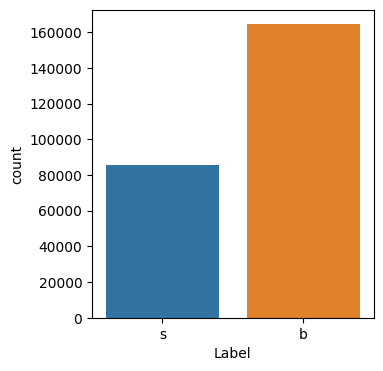

In [16]:
plt.figure(figsize=(8,4))
ax1 = plt.subplot(1,2,1)
sns.countplot(data=data, x='Label')
plt.show()

fig = px.pie(data, values=data['Label'].value_counts(sort=False), names=data['Label'].unique())
fig.show()


* Labels of pie chart was comming wrongly - sort=False in value_counts made the trick
* Slightly imbalanced

In [17]:
data['EventId'].describe()

count    250000.000000
mean     224999.500000
std       72168.927986
min      100000.000000
25%      162499.750000
50%      224999.500000
75%      287499.250000
max      349999.000000
Name: EventId, dtype: float64

* ID numbers - No signifance from model perspective

In [18]:
data.drop('EventId', axis=1, inplace=True)

Label
b    2.501018
s    0.008078
Name: Weight, dtype: float64


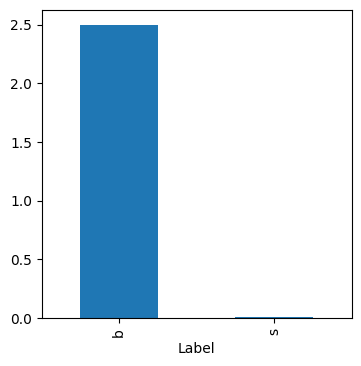

In [19]:
print(data.groupby('Label')['Weight'].mean())

plt.figure(figsize=(4,4))
data.groupby('Label')['Weight'].mean().plot(kind='bar')
plt.show()

<AxesSubplot: xlabel='Weight', ylabel='Count'>

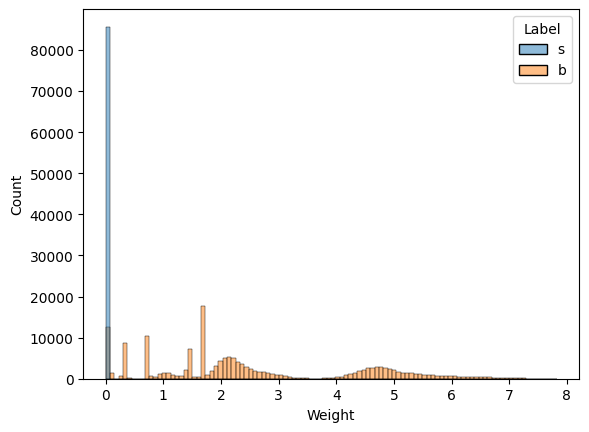

In [20]:
sns.histplot(data=data, x='Weight', hue='Label')

* Mentioned in the abstract that Weight is a clear signal to classify the signals
* Even as in above plots, with weight events can be classified
* Dropping this feature as this completely explains the target

In [87]:
data.drop('Weight', axis=1, inplace=True)

In [21]:
index = [col for col in data if -999 in data[col].value_counts()]
val   = [data[col].value_counts()[-999]/len(data) for col in data if -999 in data[col].value_counts()]
pd.Series(index=index, data=val).sort_values(ascending=False)

DER_deltaeta_jet_jet      0.709828
DER_mass_jet_jet          0.709828
DER_prodeta_jet_jet       0.709828
DER_lep_eta_centrality    0.709828
PRI_jet_subleading_pt     0.709828
PRI_jet_subleading_eta    0.709828
PRI_jet_subleading_phi    0.709828
PRI_jet_leading_pt        0.399652
PRI_jet_leading_eta       0.399652
PRI_jet_leading_phi       0.399652
DER_mass_MMC              0.152456
dtype: float64

* One another way to identify the missing values using List comprehension

Exploratory data analysis

In [101]:
def plot_distrib(df, features, bins, target, nrows=12, ncols=3):
    nrows = math.ceil(len(features) / ncols)
    print(nrows)
    fig, ax = plt.subplots(int(nrows), ncols, sharey=False, figsize=(5*ncols, 4*nrows))
    
    #for i, feat in enumerate(features):
    for i in range(len(features)):
        #print(i, features[i])
        sns.histplot(data=df, x=features[i], hue=target, bins=bins, ax=ax[i // ncols, i % ncols])
    plt.tight_layout()
    plt.show()

In [104]:
cols_to_plot

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta',
       'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

10


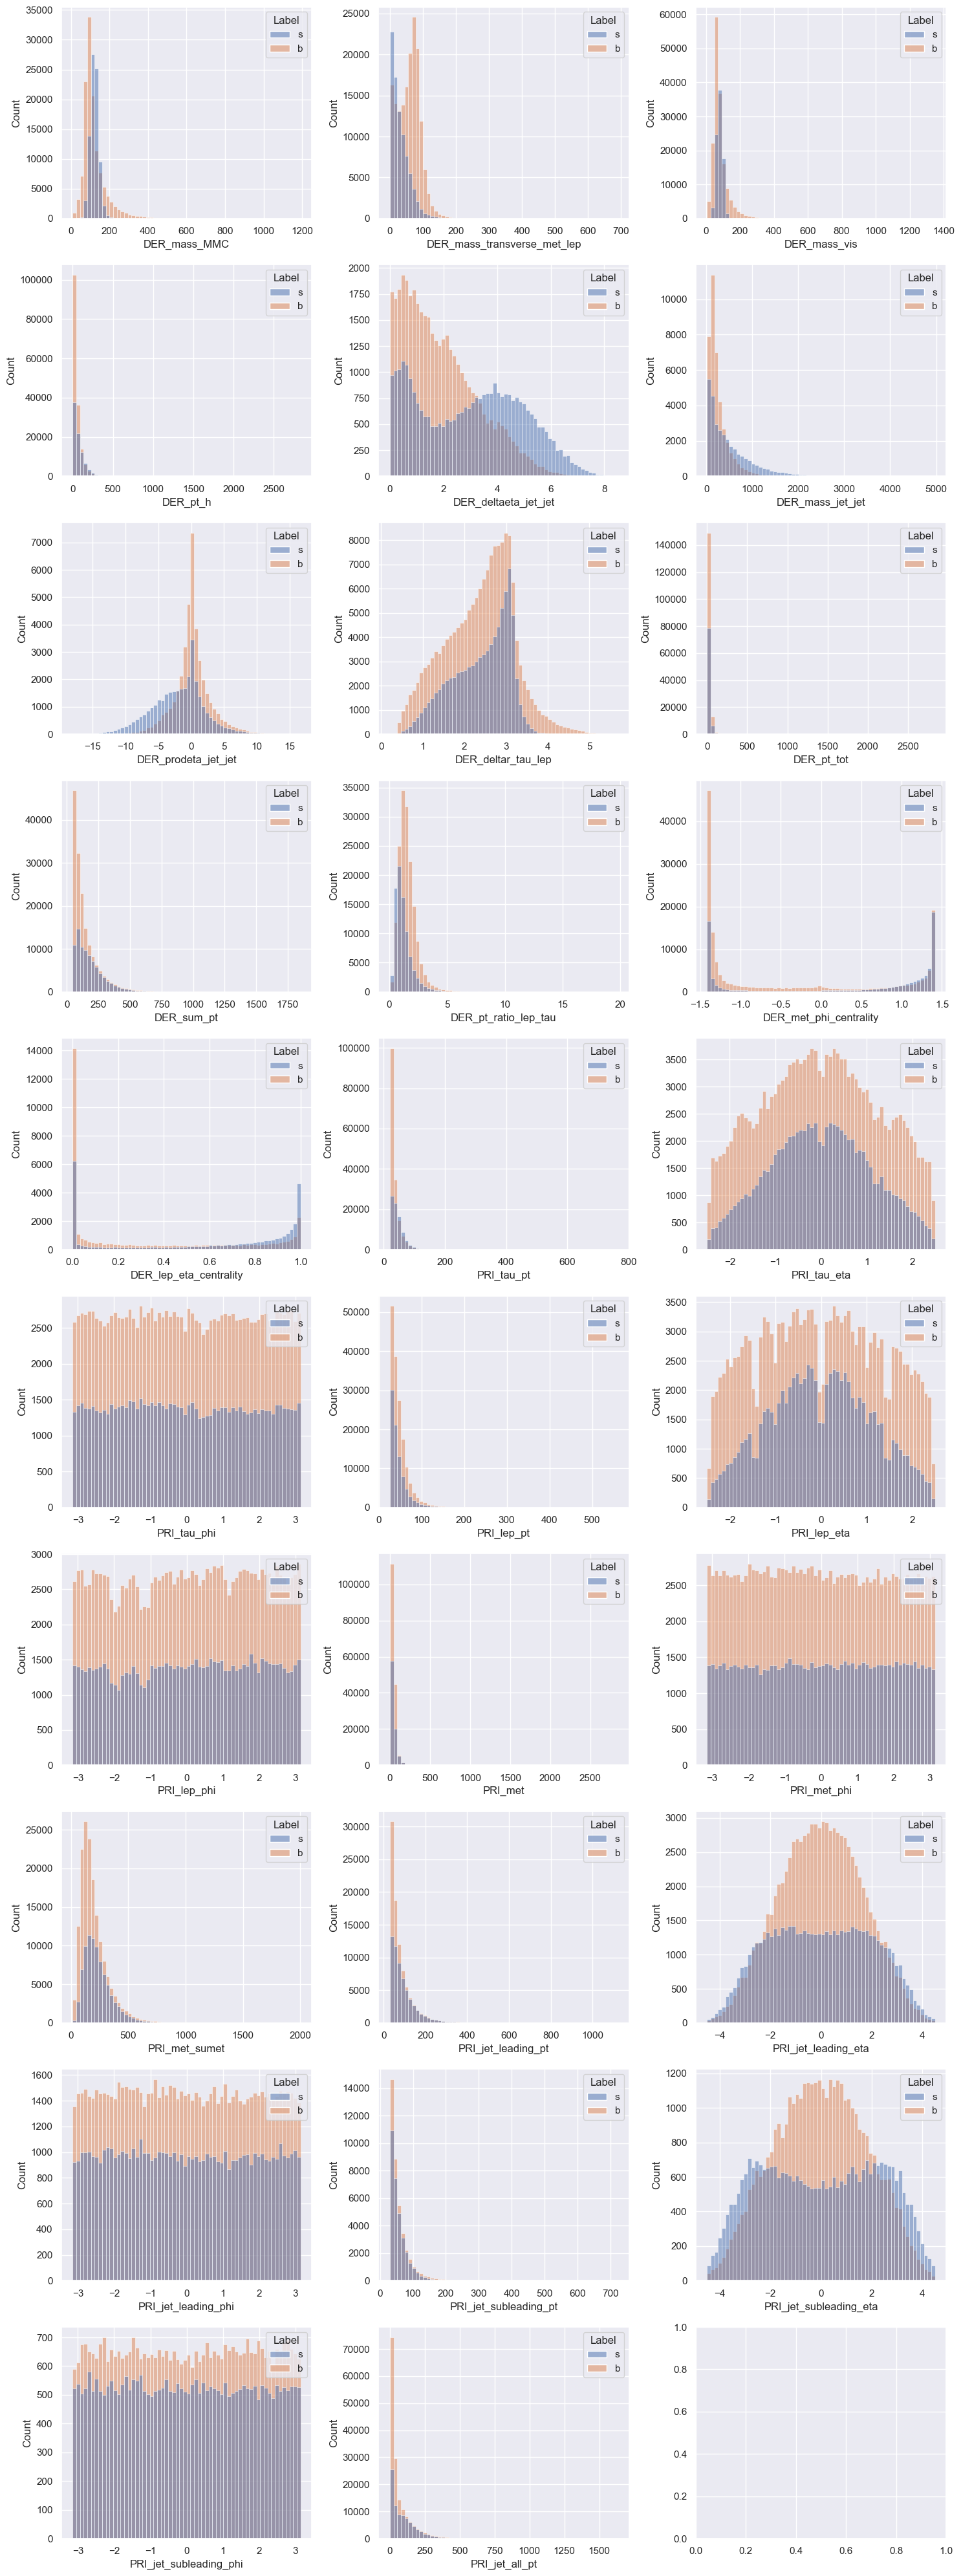

In [103]:
cols_to_plot = data.columns[data.dtypes == 'float64']
bins = math.floor(len(data) ** (1/3))

plot_distrib(data.replace(-999, np.nan), cols_to_plot, bins, 'Label')

* Hue is done based on the label - if the distribution differs between the classes in the target, those features might explain well the target

<u> Good segregation <br></u>
DER_mass_transverse_met_lep <br>
DER_deltaeta_jet_jet <br>
DER_mass_jet_jet <br>
DER_prodeta_jet_jet <br>
DER_deltar_tau_lep <br>

<u> Segregation to some extent <br> </u>
DER_mass_vis <br>
DER_met_phi_centrality <br>

* Check for skewness

In [119]:
df_skew=pd.DataFrame(data[data.columns[data.dtypes == 'float64']].replace(-999, np.nan).skew(), columns=['skewness'])
df_skew.sort_values(by='skewness', ascending=False)

skewness
DER_pt_tot                   10.579309
PRI_met                       5.270755
DER_mass_MMC                  3.807351
DER_mass_vis                  3.790262
PRI_tau_pt                    3.755191
PRI_jet_subleading_pt         3.394232
PRI_lep_pt                    3.240762
DER_pt_ratio_lep_tau          2.633521
PRI_jet_leading_pt            2.564700
DER_pt_h                      2.541885
DER_mass_jet_jet              2.457852
PRI_jet_all_pt                2.379556
DER_sum_pt                    2.320647
PRI_met_sumet                 1.849445
DER_mass_transverse_met_lep   1.219211
DER_deltaeta_jet_jet          0.577082
DER_met_phi_centrality        0.151136
DER_lep_eta_centrality        0.073373
PRI_lep_eta                   0.021623
PRI_tau_eta                   0.017852
PRI_jet_leading_phi           0.016784
PRI_tau_phi                   0.013872
PRI_met_phi                   0.007908
PRI_jet_subleading_phi        0.003598
PRI_jet_leading_eta           0.000151
PRI_jet_subleading_eta       -0.005032
PRI_lep_phi                  -0.045746
DER_deltar_tau_lep           -0.215782
DER_prodeta_jet_jet          -0.328458

<u> Extremely skewed </u> skewness more than 3 <br>
DER_pt_tot	10.579309 <br>
PRI_met	5.270755 <br>
DER_mass_MMC	3.807351 <br>
DER_mass_vis	3.790262 <br>
PRI_tau_pt	3.755191 <br>
PRI_jet_subleading_pt	3.394232 <br>
PRI_lep_pt	3.240762 <br>

<u> Positively skewed </u> skewness between 1 and 3 <br>
DER_pt_ratio_lep_tau	2.633521 <br>
PRI_jet_leading_pt	2.564700 <br>
DER_pt_h	2.541885 <br>
DER_mass_jet_jet	2.457852 <br>
PRI_jet_all_pt	2.379556 <br>
DER_sum_pt	2.320647 <br>
PRI_met_sumet	1.849445 <br>
DER_mass_transverse_met_lep	1.219211 <br>

<u> Moderately skewed </u> skewness between 0.5 and 1 <br>
DER_deltaeta_jet_jet	0.577082


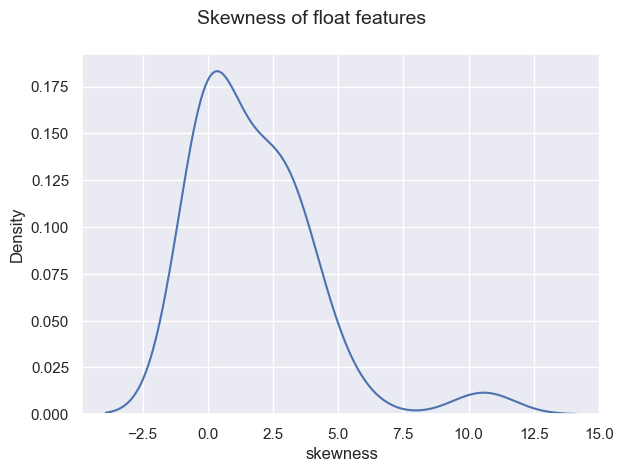

In [121]:
sns.kdeplot(data=df_skew, x='skewness')
plt.suptitle("Skewness of float features", fontsize = 14)
plt.tight_layout()
plt.show()

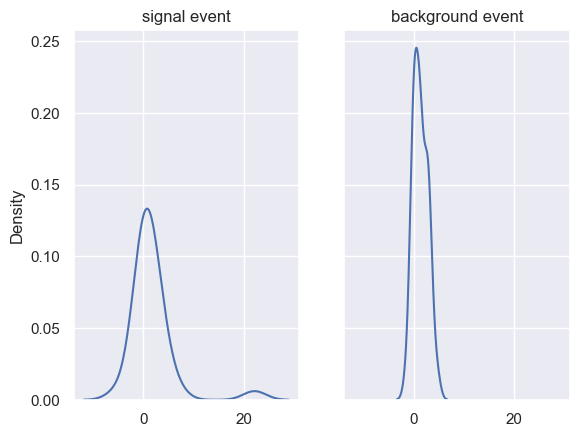

In [146]:
data_s = data[data['Label'] == 's']
data_b = data[data['Label'] == 'b']

fig, ax = plt.subplots(1,2, sharex=True, sharey=True)

sns.kdeplot(data_s[data_s.columns[data_s.dtypes == 'float64']].skew(), ax=ax[0])
ax[0].set_title('signal event')

sns.kdeplot(data_b[data_b.columns[data_b.dtypes == 'float64']].skew(), ax=ax[1])
ax[1].set_title('background event')

plt.show()


Considering all features, singal events has extreme positive skewness as per above skewness distribution(around 11)

#### Kurtosis

[Kurtosis](https://en.wikipedia.org/wiki/Kurtosis) generally quantifies the peakedness and tailedness of a distribution. It is given by

$$ b_2 = \frac{\frac{1}{n}\sum_{i=1}^n\left(x_i-\bar{x}\right)^4}{\left[\frac{1}{n}\sum_{i=1}^n\left(x_i-\bar{x}\right)^2\right]^2}, $$

where $\bar{x}$ is the mean of the observations, given by $\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i$. A relocated version of the kurtosis, taking into account the fact that $b_2 = 3$ for the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) is defined as the [Excess kurtosis](https://en.wikipedia.org/wiki/Kurtosis#Excess_kurtosis), given by $g_2 := b_2 - 3$. The measure $g_2$ can be negative, zero, positive. A value close to $0$ suggests that the distribution has similar kurtosis as that of the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution). A positive excess kurtosis ([leptokurtic distribution](https://en.wikipedia.org/wiki/Kurtosis#Leptokurtic)) indicates that the distribution has more concentration towards the center or the tails, giving it a rather slender shape (*lepto-* literally means slender). On the other hand a negative excess kurtosis ([Platykurtic distribution](https://en.wikipedia.org/wiki/Kurtosis#Platykurtic)) indicates that the distribution has more concentration in the regions between the center and the tails, giving it a broad shape (*platy-* literally means *broad*).

**Note:** The ability of the measure $b_2$ or $g_2$ to quantify peakedness of a distribution has been a topic of debate. See [this paper](https://www.jstor.org/stable/24591697?seq=1) for more details.

In [148]:
df_kurt=pd.DataFrame(data[data.columns[data.dtypes == 'float64']].replace(-999, np.nan).kurt(), columns=['kurtosis'])
df_kurt.sort_values(by='kurtosis', ascending=False, inplace=True)
df_kurt

kurtosis
DER_pt_tot                   1036.490806
PRI_met                       227.340040
DER_mass_vis                   35.493510
PRI_tau_pt                     30.511711
DER_mass_MMC                   27.750916
PRI_jet_subleading_pt          23.671115
DER_pt_h                       22.027717
PRI_lep_pt                     21.582710
DER_pt_ratio_lep_tau           18.297434
PRI_jet_leading_pt             10.556527
PRI_jet_all_pt                  9.881543
DER_sum_pt                      8.837216
DER_mass_jet_jet                8.444995
DER_mass_transverse_met_lep     6.366788
PRI_met_sumet                   6.263092
DER_prodeta_jet_jet             1.484246
DER_deltar_tau_lep             -0.222446
DER_deltaeta_jet_jet           -0.577399
PRI_jet_leading_eta            -0.698769
PRI_tau_eta                    -0.842290
PRI_jet_subleading_eta         -0.893344
PRI_lep_eta                    -0.956976
PRI_lep_phi                    -1.190117
PRI_met_phi                    -1.196075
PRI_tau_phi                    -1.200578
PRI_jet_leading_phi            -1.203062
PRI_jet_subleading_phi         -1.207655
DER_lep_eta_centrality         -1.681538
DER_met_phi_centrality         -1.768109

**Observations:**

- Columns with extreme leptokurtosis (excess kurtosis greater than $3$ in the training set): <br>
DER_pt_tot	1036.490806 <br>
PRI_met	227.340040 <br>
DER_mass_vis	35.493510 <br>
PRI_tau_pt	30.511711 <br>
DER_mass_MMC	27.750916 <br>
PRI_jet_subleading_pt	23.671115 <br>
DER_pt_h	22.027717 <br>
PRI_lep_pt	21.582710 <br>
DER_pt_ratio_lep_tau	18.297434 <br>
PRI_jet_leading_pt	10.556527 <br>
PRI_jet_all_pt	9.881543 <br>
DER_sum_pt	8.837216 <br>
DER_mass_jet_jet	8.444995 <br>
DER_mass_transverse_met_lep	6.366788 <br>
PRI_met_sumet	6.263092 <br>
<br>

Columns with high leptokurtosis (excess kurtosis between $1$ and $3$ in the training set): <br>
DER_prodeta_jet_jet	1.484246 <br>
<br>

Columns with high platykurtosis (excess kurtosis between $-3$ and $-1$ in the training set): <br>
PRI_lep_phi	-1.190117 <br>
PRI_met_phi	-1.196075 <br>
PRI_tau_phi	-1.200578 <br>
PRI_jet_leading_phi	-1.203062 <br>
PRI_jet_subleading_phi	-1.207655 <br>
DER_lep_eta_centrality	-1.681538 <br>
DER_met_phi_centrality	-1.768109 <br>

Columns with moderate platykurtosis (excess kurtosis between $-1$ and $-0.5$ in the training set): <br>
DER_deltaeta_jet_jet	-0.577399 <br>
PRI_jet_leading_eta	-0.698769 <br>
PRI_tau_eta	-0.842290 <br>
PRI_jet_subleading_eta	-0.893344 <br>
PRI_lep_eta	-0.956976 <br>



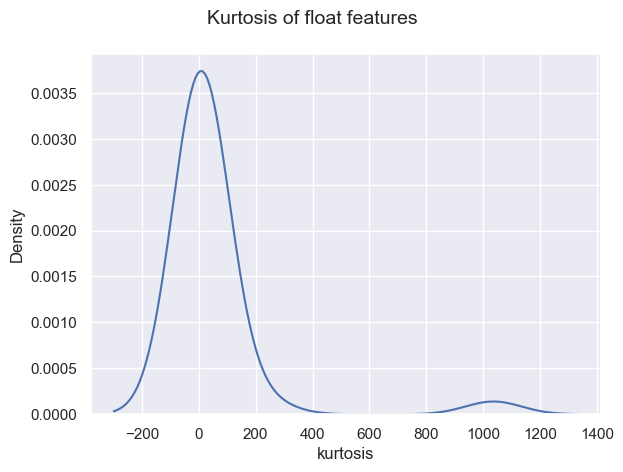

In [149]:
sns.kdeplot(data=df_kurt, x='kurtosis')
plt.suptitle("Kurtosis of float features", fontsize = 14)
plt.tight_layout()
plt.show()

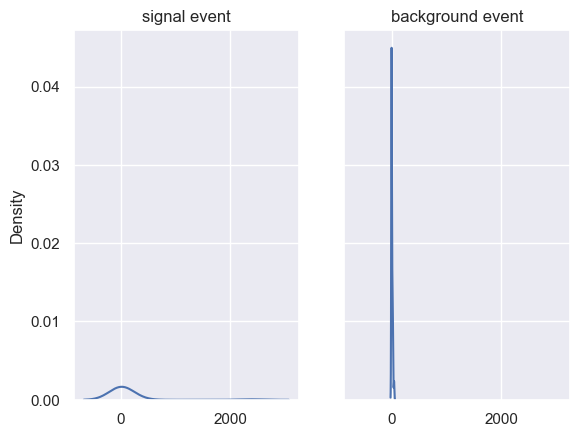

In [150]:
data_s = data[data['Label'] == 's']
data_b = data[data['Label'] == 'b']

fig, ax = plt.subplots(1,2, sharex=True, sharey=True)

sns.kdeplot(data_s[data_s.columns[data_s.dtypes == 'float64']].kurt(), ax=ax[0])
ax[0].set_title('signal event')

sns.kdeplot(data_b[data_b.columns[data_b.dtypes == 'float64']].kurt(), ax=ax[1])
ax[1].set_title('background event')

plt.show()


### Integer feature

2    50379
1    77544
0    99913
3    22164
Name: PRI_jet_num, dtype: int64


<AxesSubplot: xlabel='PRI_jet_num'>

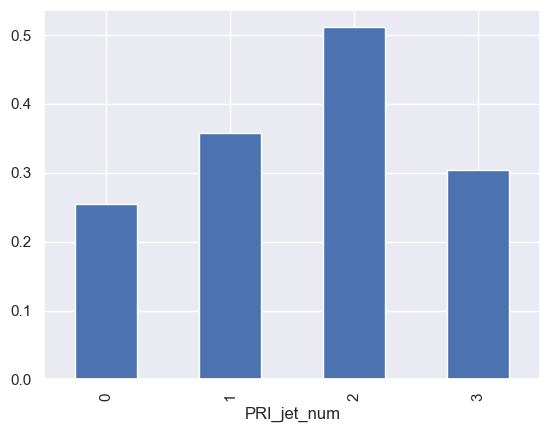

In [163]:
print(data['PRI_jet_num'].value_counts(sort=False))

temp = data.copy(deep=True)
temp['Label_enc'] = temp['Label'].map({'b':0, 's':1})
temp.groupby('PRI_jet_num')['Label_enc'].mean().plot(kind='bar')

2
s    25734
b    24645
Name: Label, dtype: int64
1
b    49834
s    27710
Name: Label, dtype: int64
0
b    74421
s    25492
Name: Label, dtype: int64
3
b    15433
s     6731
Name: Label, dtype: int64


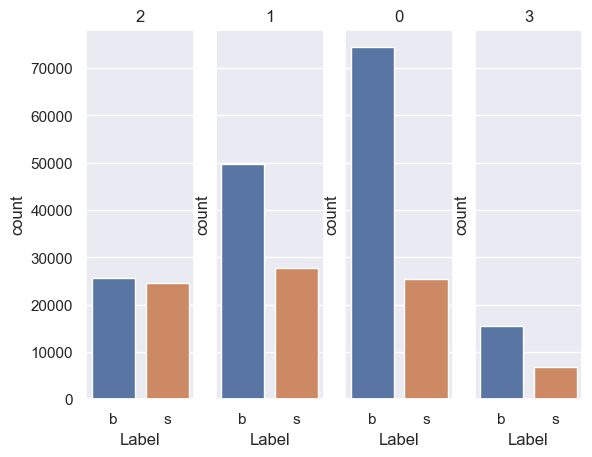

In [188]:
fig, ax = plt.subplots(1,4, sharex=True, sharey=True)

for i, val in enumerate(data['PRI_jet_num'].unique()):
    print(val)
    temp = data[data['PRI_jet_num'] == val].copy(deep=True)
    print(temp['Label'].value_counts())
    
    sns.countplot(data=temp, x='Label', ax=ax[i])
    ax[i].set_title(val)

On an average pri-jet-num being 2 has seen equal signal events similar top background events <br>
Value being 0, more background events are observed compared to signal events

Multivariate Analysis

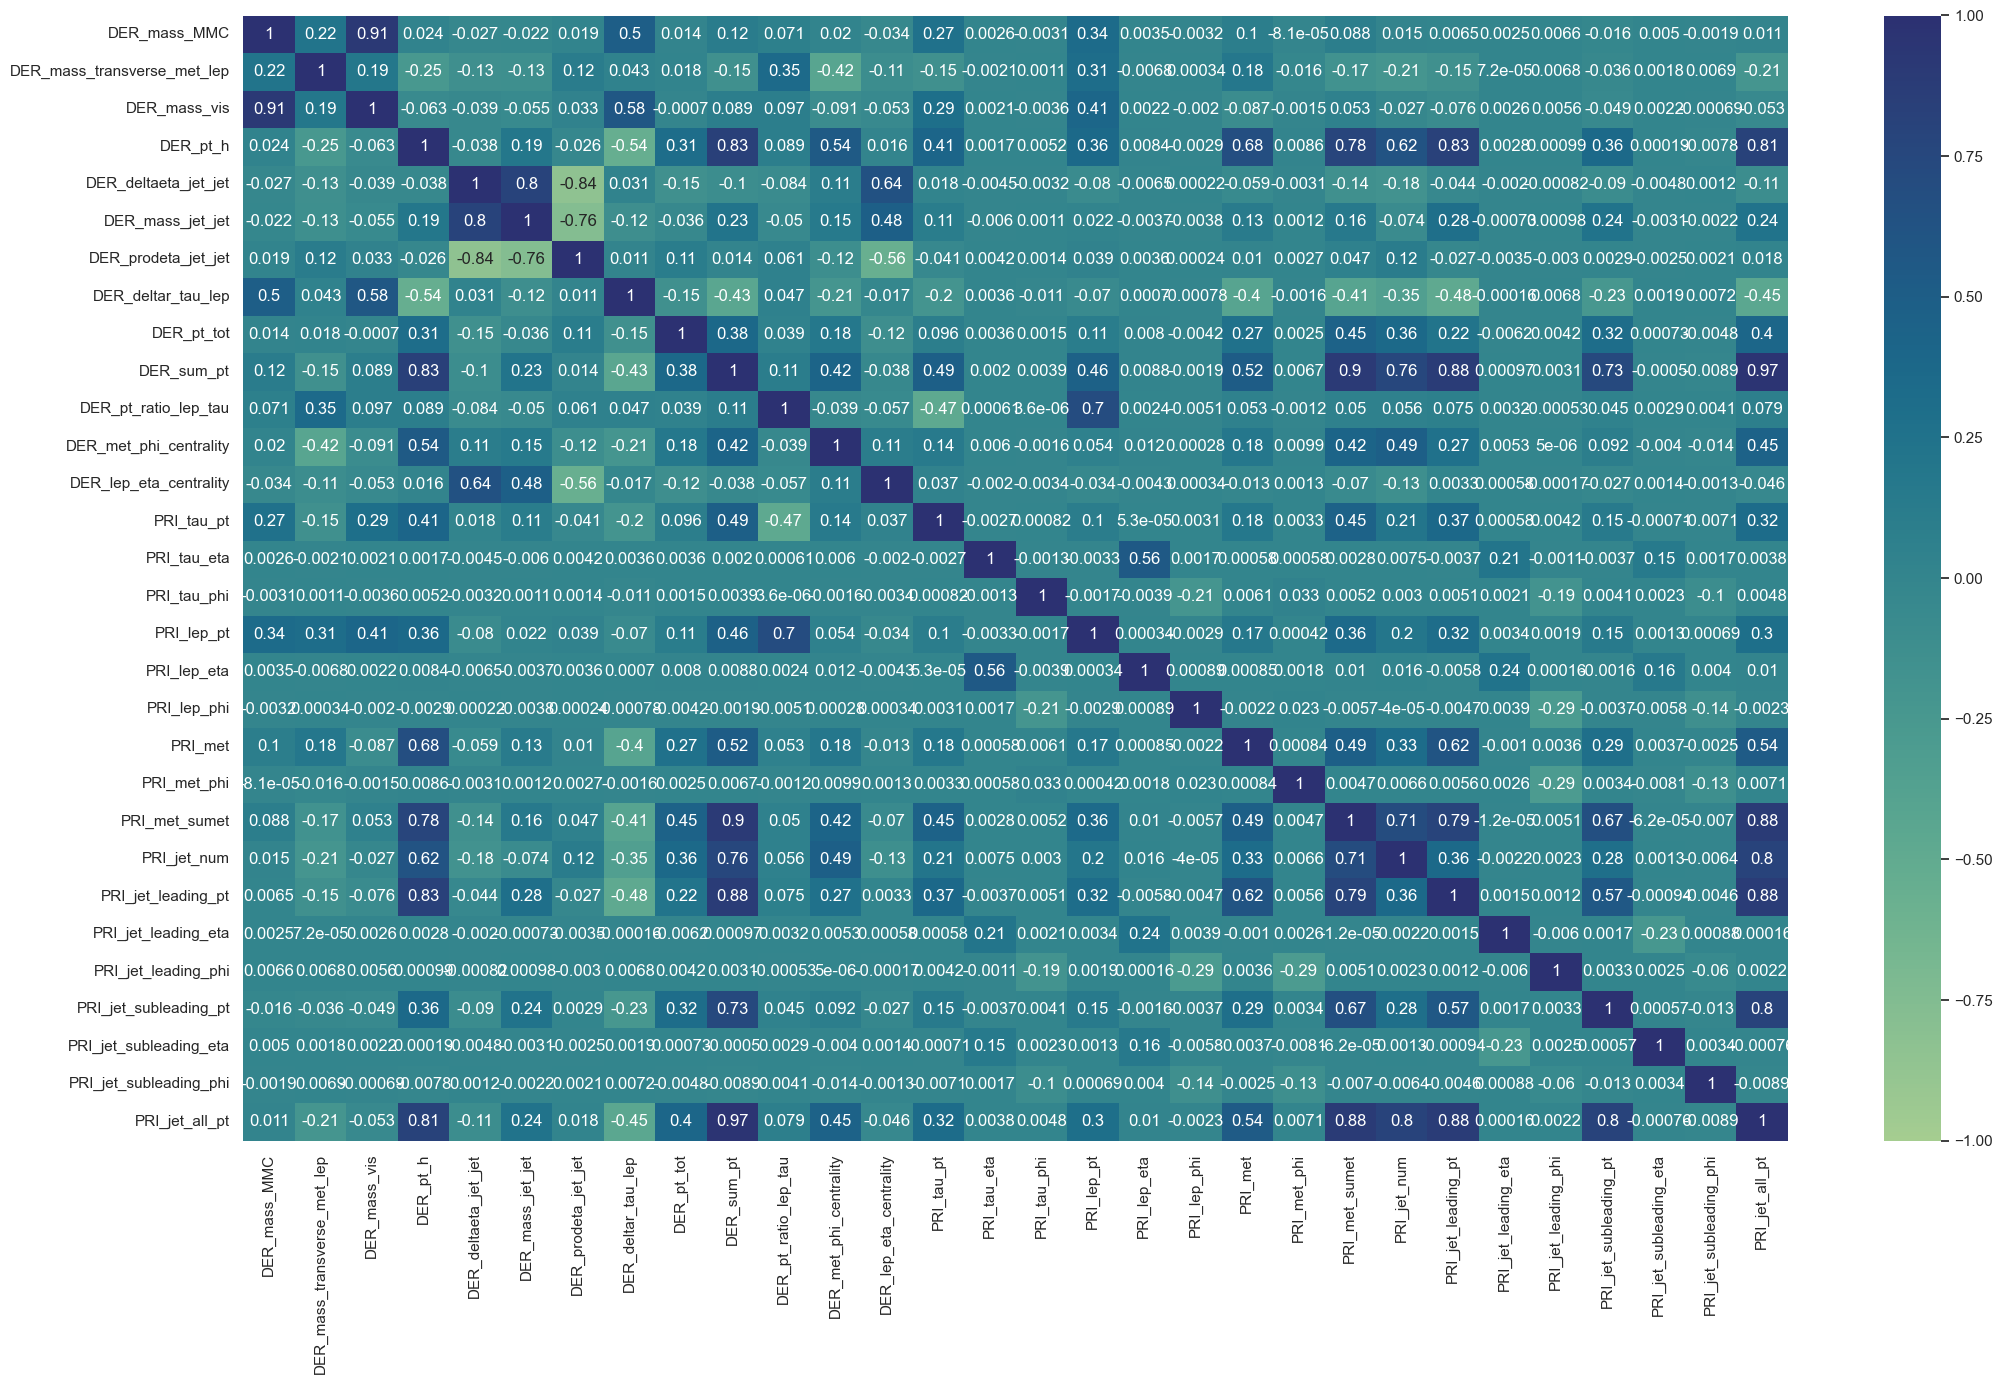

In [197]:
plt.figure(figsize=(22,14))
sns.heatmap(data.replace(-999, np.nan).corr(), annot=True, vmin=-1, vmax=1, cmap='crest')
plt.tight_layout()

- DER_mass_vis & DER_mass_MMC - 91% correlated
- DER_mass_jet_jet & DER_deltadelta_jet_jet are 80% correlated
* DER_probda_jet_jet & DER_deltadelta_jet_jet are -84% correlated
- DER_mass_jet_jet & DER_probda_jet_jet are -76% correlated
- DER_pt_h & DER_sum_pt are 83% correlated

There are many such pairs of correlated features - For sure, these can trouble the linear based models

In [199]:
data['Label_enc'] = data['Label'].map({'b':0, 's':1})
print(data["Label"].value_counts())
print(data["Label_enc"].value_counts())

b    164333
s     85667
Name: Label, dtype: int64
0    164333
1     85667
Name: Label_enc, dtype: int64


Correlateion plto with the target feature

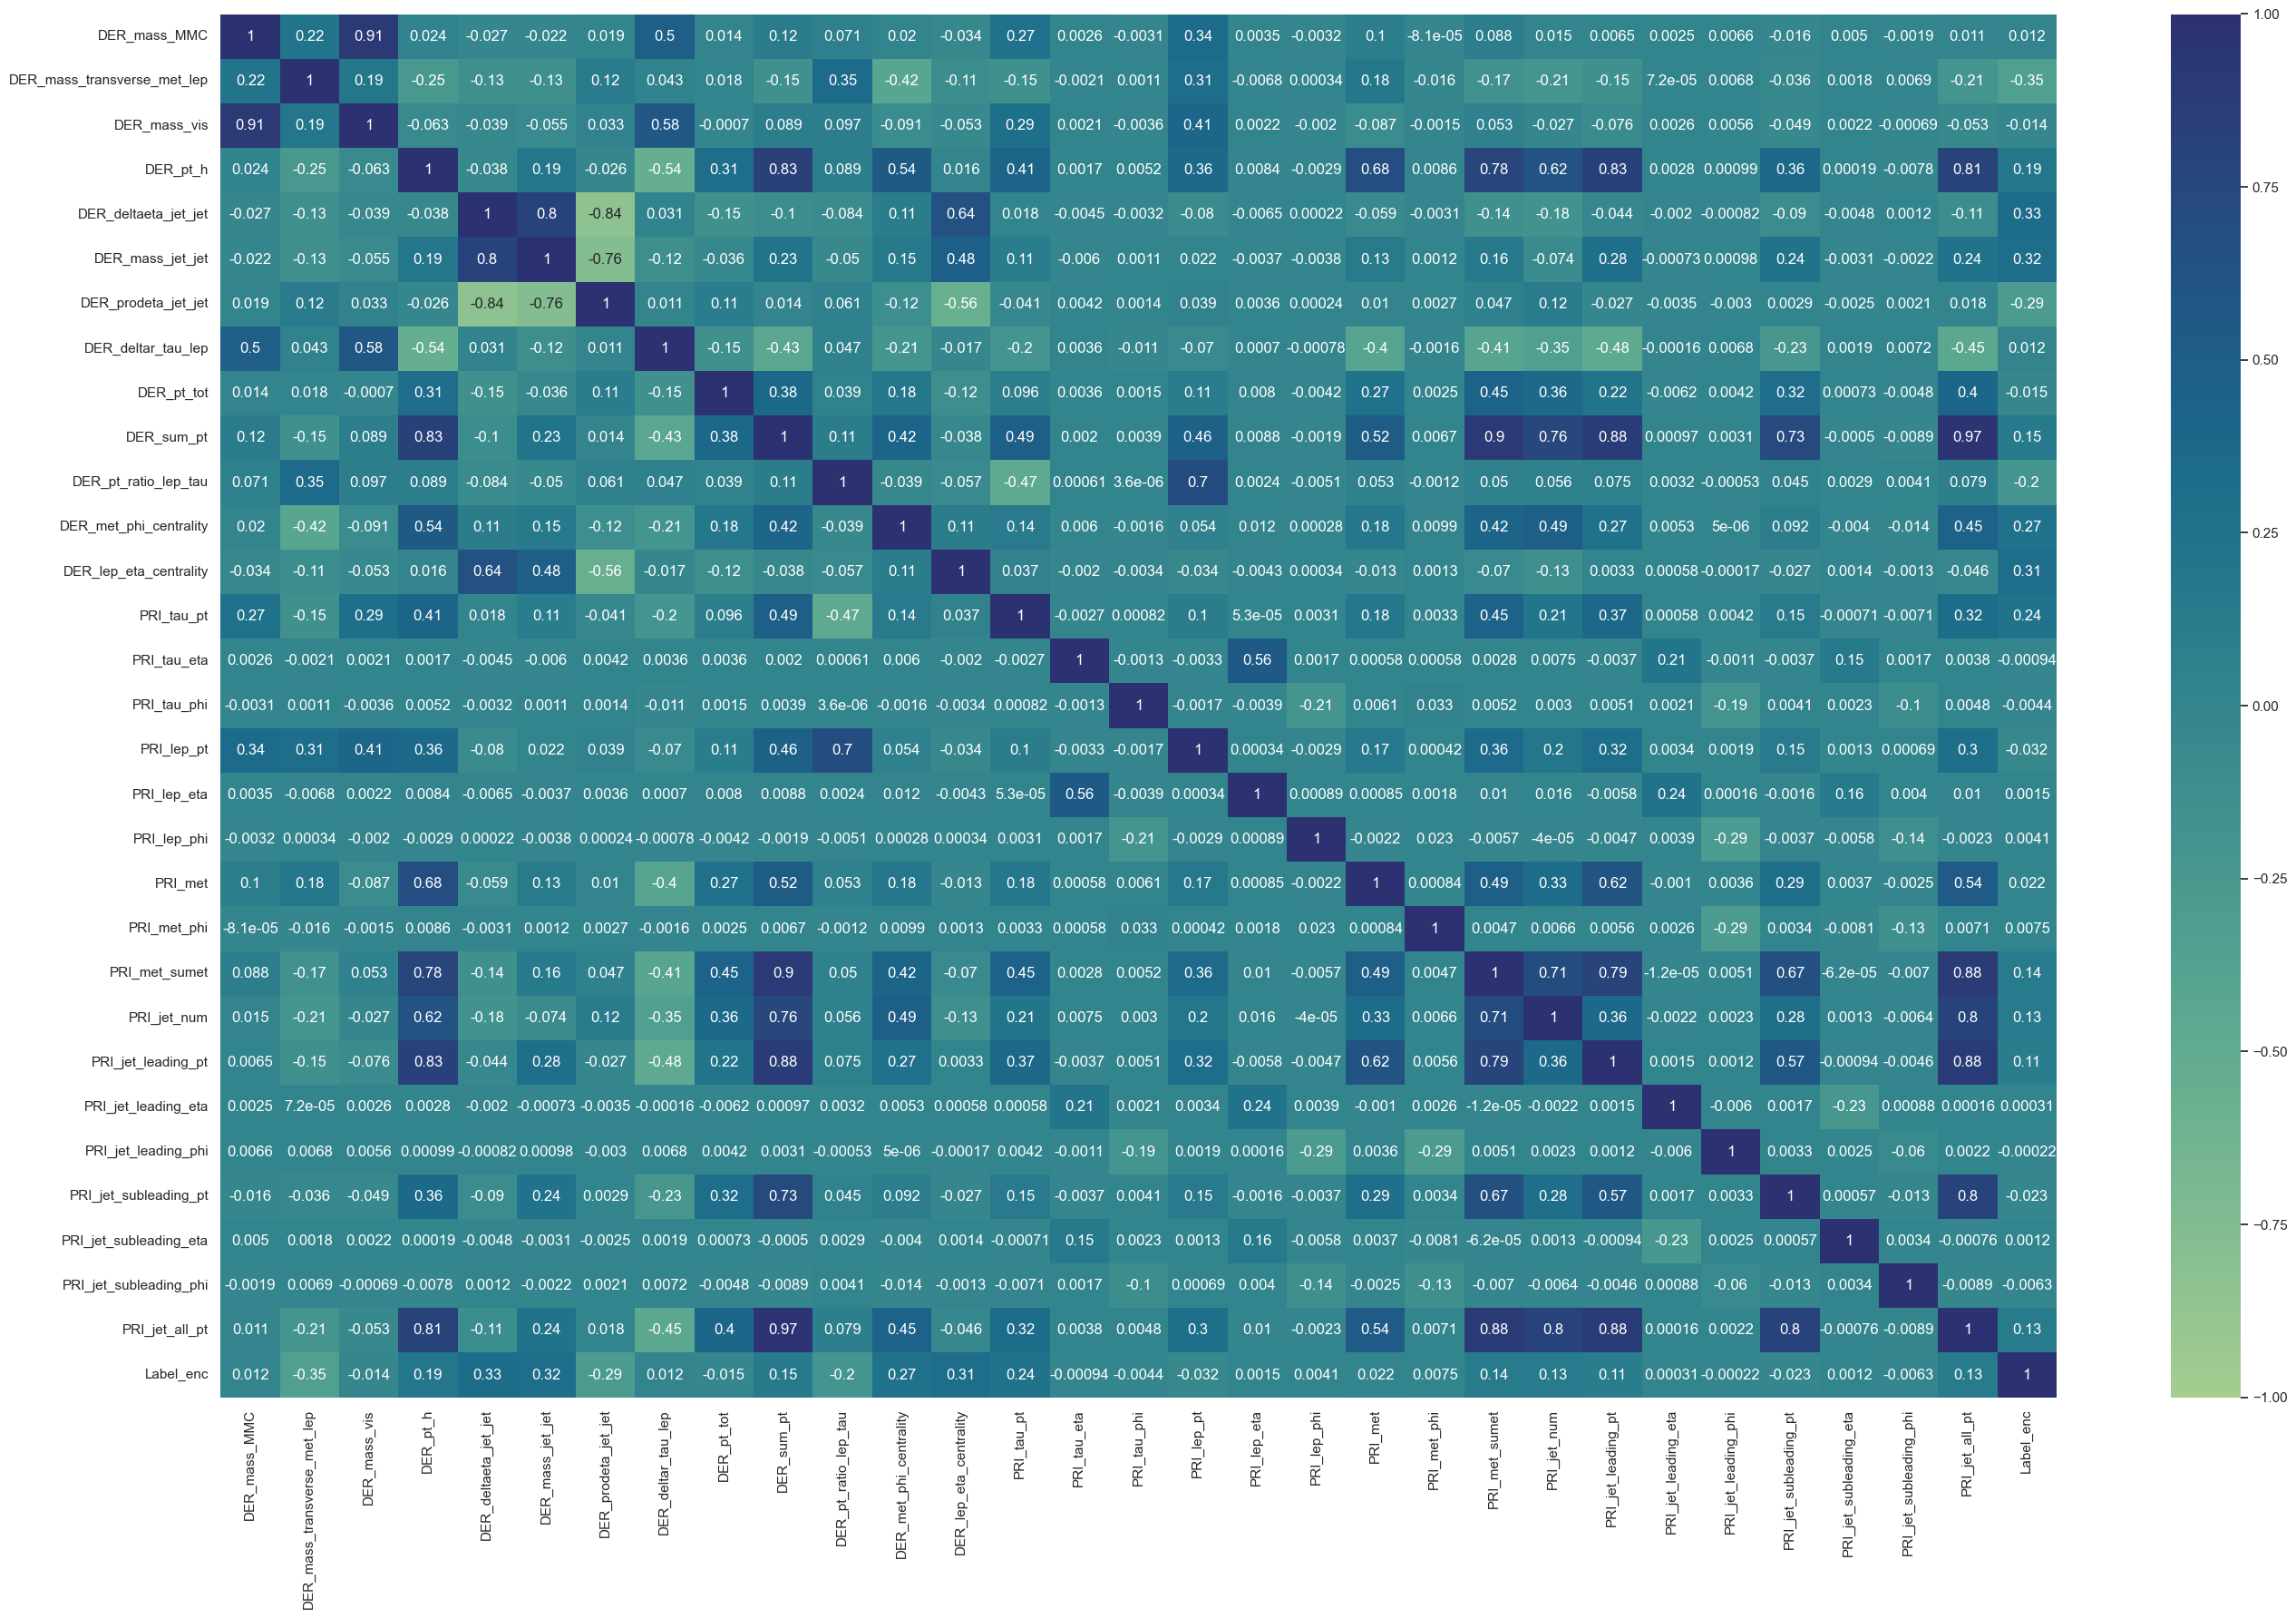

In [204]:
plt.figure(figsize=(28,18))
sns.heatmap(data.replace(-999, np.nan).corr(), annot=True, vmin=-1, vmax=1, cmap='crest')
plt.tight_layout()

- DER_deltadelta_jet_jet 33% correlated with Label
- DER_mass_jet_jet 32% correlated with Label
- DeR_probda_jet_jet -29% correlated with Label
- DER_met_phi_centrality - 27% correlated with Label
- DER_lep_eta_centrality - 31% correlated with Label
- PRI_tau_pt - 24% correlated with Label

<AxesSubplot: >

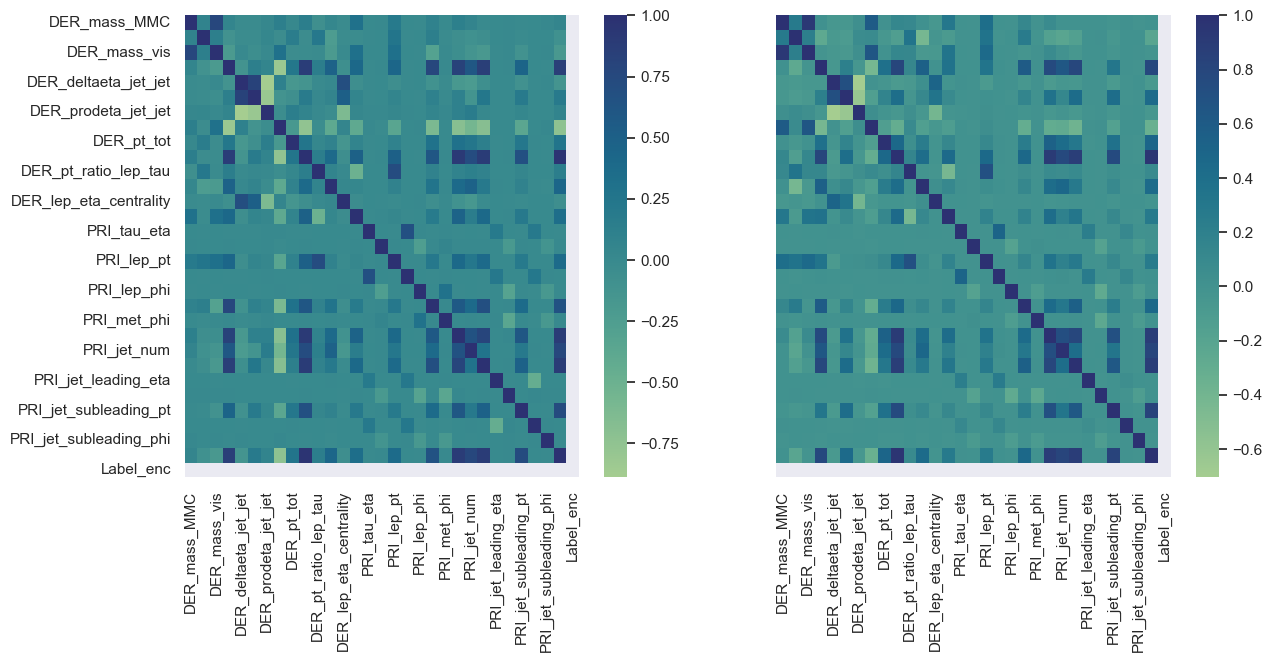

In [209]:
data_s = data[data['Label'] == 's']
data_b = data[data['Label'] == 'b']

fig, ax = plt.subplots(1,2, sharey=True, figsize=(14,6))
sns.heatmap(data_s.replace(-999, np.nan).corr(), cmap='crest', ax=ax[0])
sns.heatmap(data_b.replace(-999, np.nan).corr(), cmap='crest', ax=ax[1])

Both correlation set for signal & background events look similar only

Bivariate scatterplot


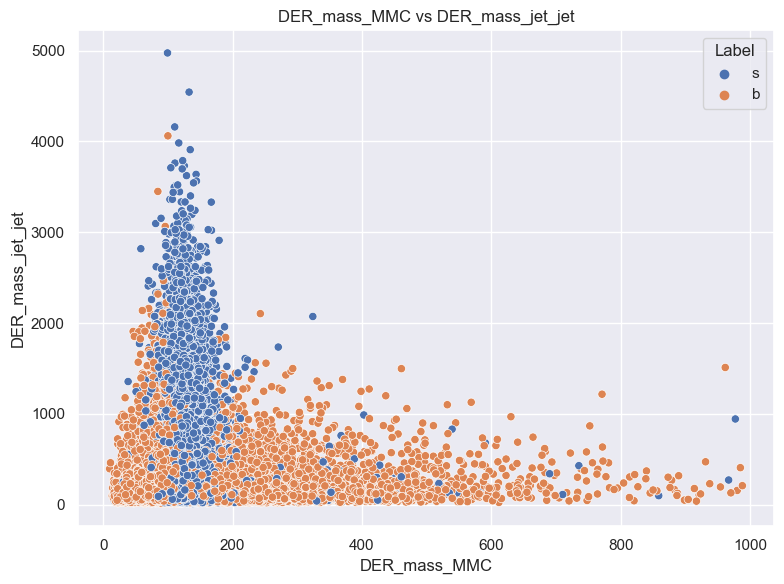

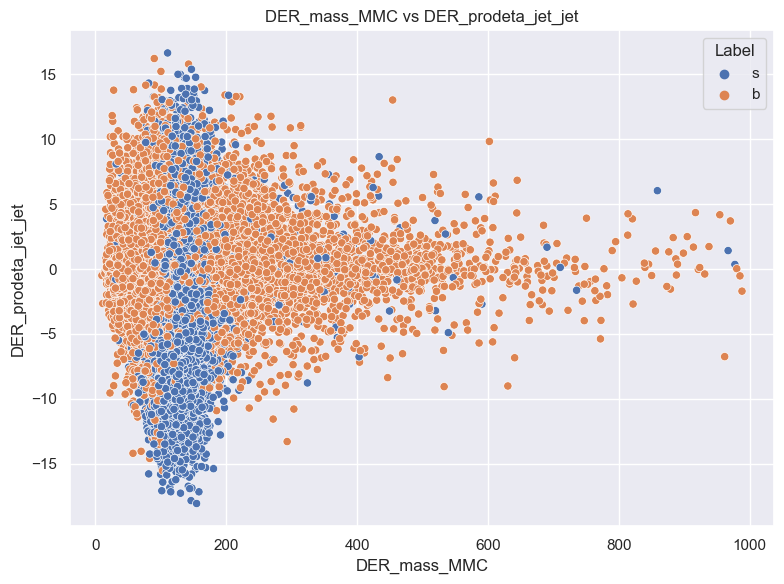

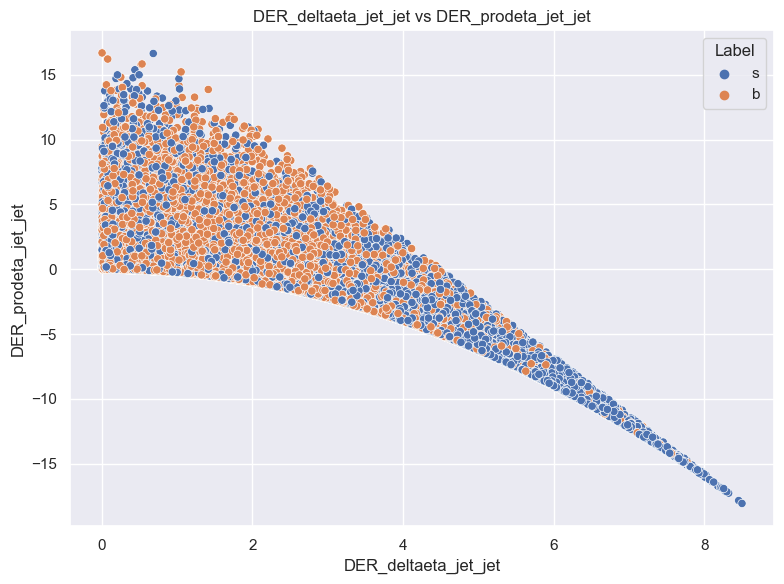

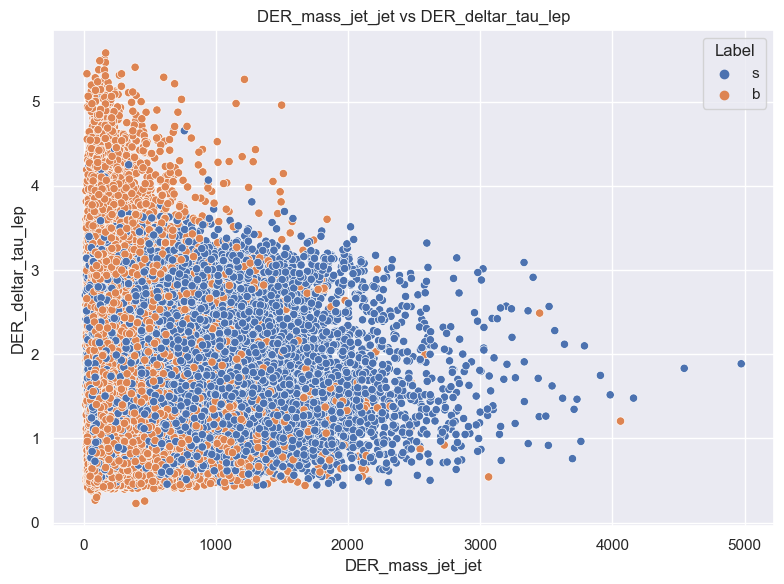

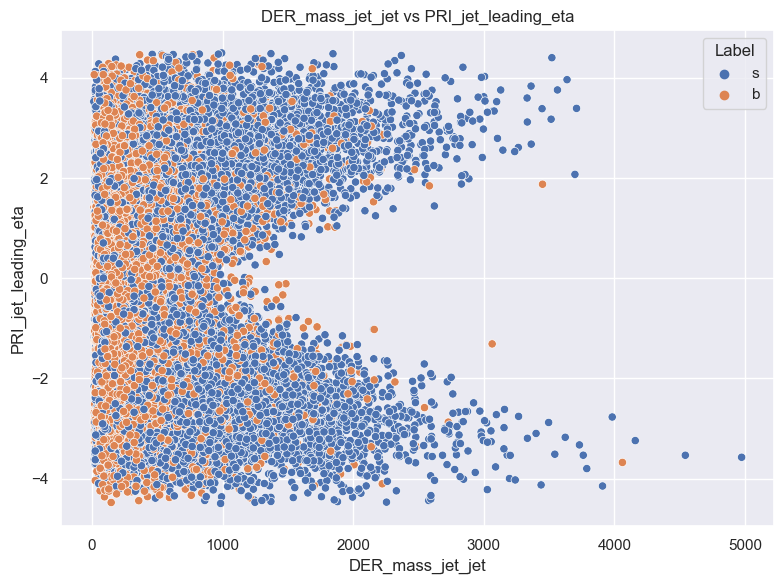

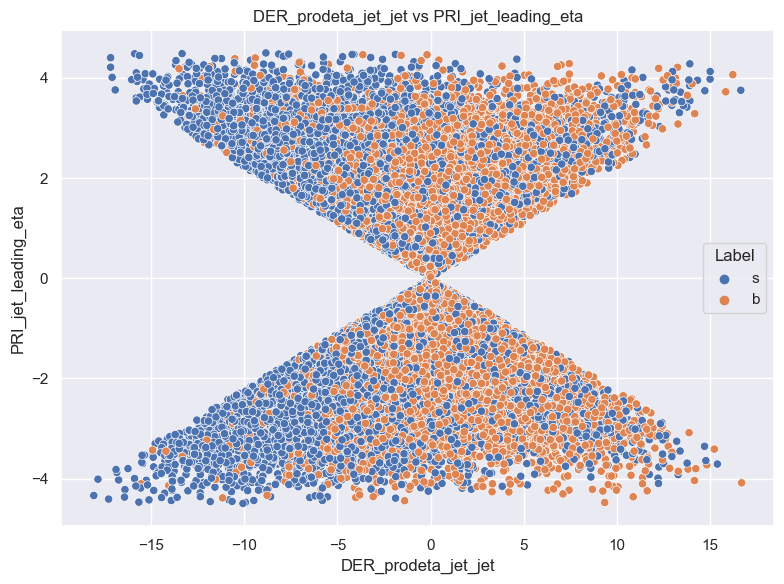

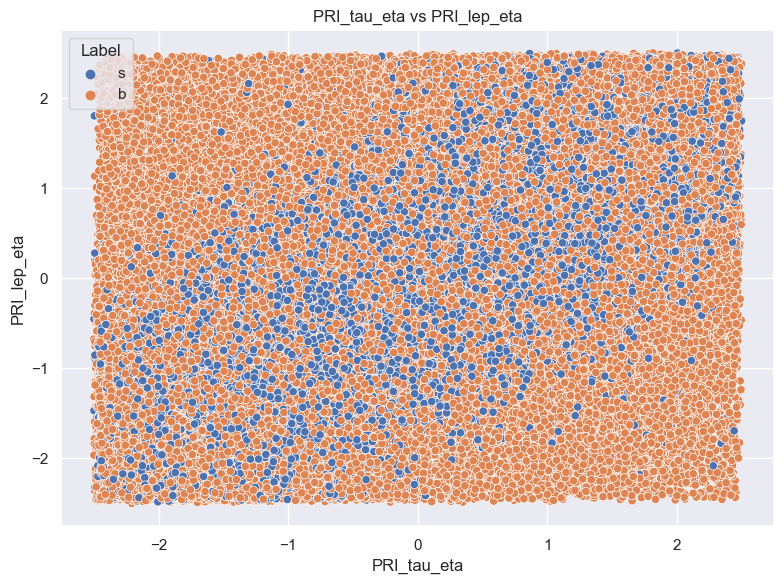

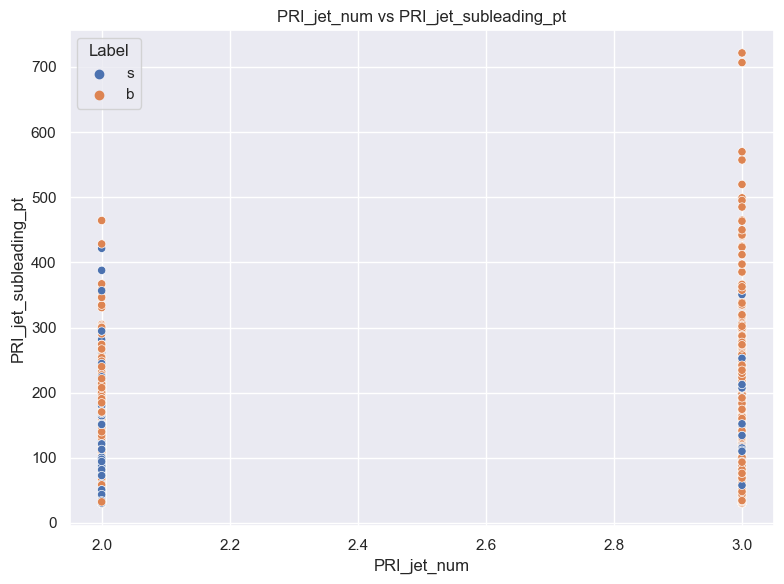

In [216]:
# Selected bivariate scatterplots
pairs_selected = [
    ('DER_mass_MMC', 'DER_mass_jet_jet'),
    ('DER_mass_MMC', 'DER_prodeta_jet_jet'),
    ('DER_deltaeta_jet_jet', 'DER_prodeta_jet_jet'),
    ('DER_mass_jet_jet', 'DER_deltar_tau_lep'),
    ('DER_mass_jet_jet', 'PRI_jet_leading_eta'),
    ('DER_prodeta_jet_jet', 'PRI_jet_leading_eta'),
    ('PRI_tau_eta', 'PRI_lep_eta'),
    ('PRI_jet_num', 'PRI_jet_subleading_pt')
]

for z in pairs_selected:
    fig, ax = plt.subplots(1,1, sharex=True, sharey=True, figsize=(8,6))
    sns.scatterplot(data=data.replace(-999, np.nan), x=z[0], y=z[1], hue= 'Label', ax = ax)
    ax.set_title(f"{z[0]} vs {z[1]}" )
    plt.tight_layout()
    

* For few of the apirs, there are linear relationship and the labels can also be separated

# Modelling

In [219]:
miss_df

index       0      perc
27        PRI_jet_subleading_pt  177457  0.709828
29       PRI_jet_subleading_phi  177457  0.709828
5          DER_deltaeta_jet_jet  177457  0.709828
6              DER_mass_jet_jet  177457  0.709828
7           DER_prodeta_jet_jet  177457  0.709828
28       PRI_jet_subleading_eta  177457  0.709828
13       DER_lep_eta_centrality  177457  0.709828
26          PRI_jet_leading_phi   99913  0.399652
25          PRI_jet_leading_eta   99913  0.399652
24           PRI_jet_leading_pt   99913  0.399652
1                  DER_mass_MMC   38114  0.152456
23                  PRI_jet_num       0  0.000000
21                  PRI_met_phi       0  0.000000
22                PRI_met_sumet       0  0.000000
0                       EventId       0  0.000000
19                  PRI_lep_phi       0  0.000000
30               PRI_jet_all_pt       0  0.000000
31                       Weight       0  0.000000
20                      PRI_met       0  0.000000
16                  PRI_tau_phi       0  0.000000
18                  PRI_lep_eta       0  0.000000
17                   PRI_lep_pt       0  0.000000
15                  PRI_tau_eta       0  0.000000
14                   PRI_tau_pt       0  0.000000
12       DER_met_phi_centrality       0  0.000000
11         DER_pt_ratio_lep_tau       0  0.000000
10                   DER_sum_pt       0  0.000000
9                    DER_pt_tot       0  0.000000
8            DER_deltar_tau_lep       0  0.000000
4                      DER_pt_h       0  0.000000
3                  DER_mass_vis       0  0.000000
2   DER_mass_transverse_met_lep       0  0.000000
32                        Label       0  0.000000

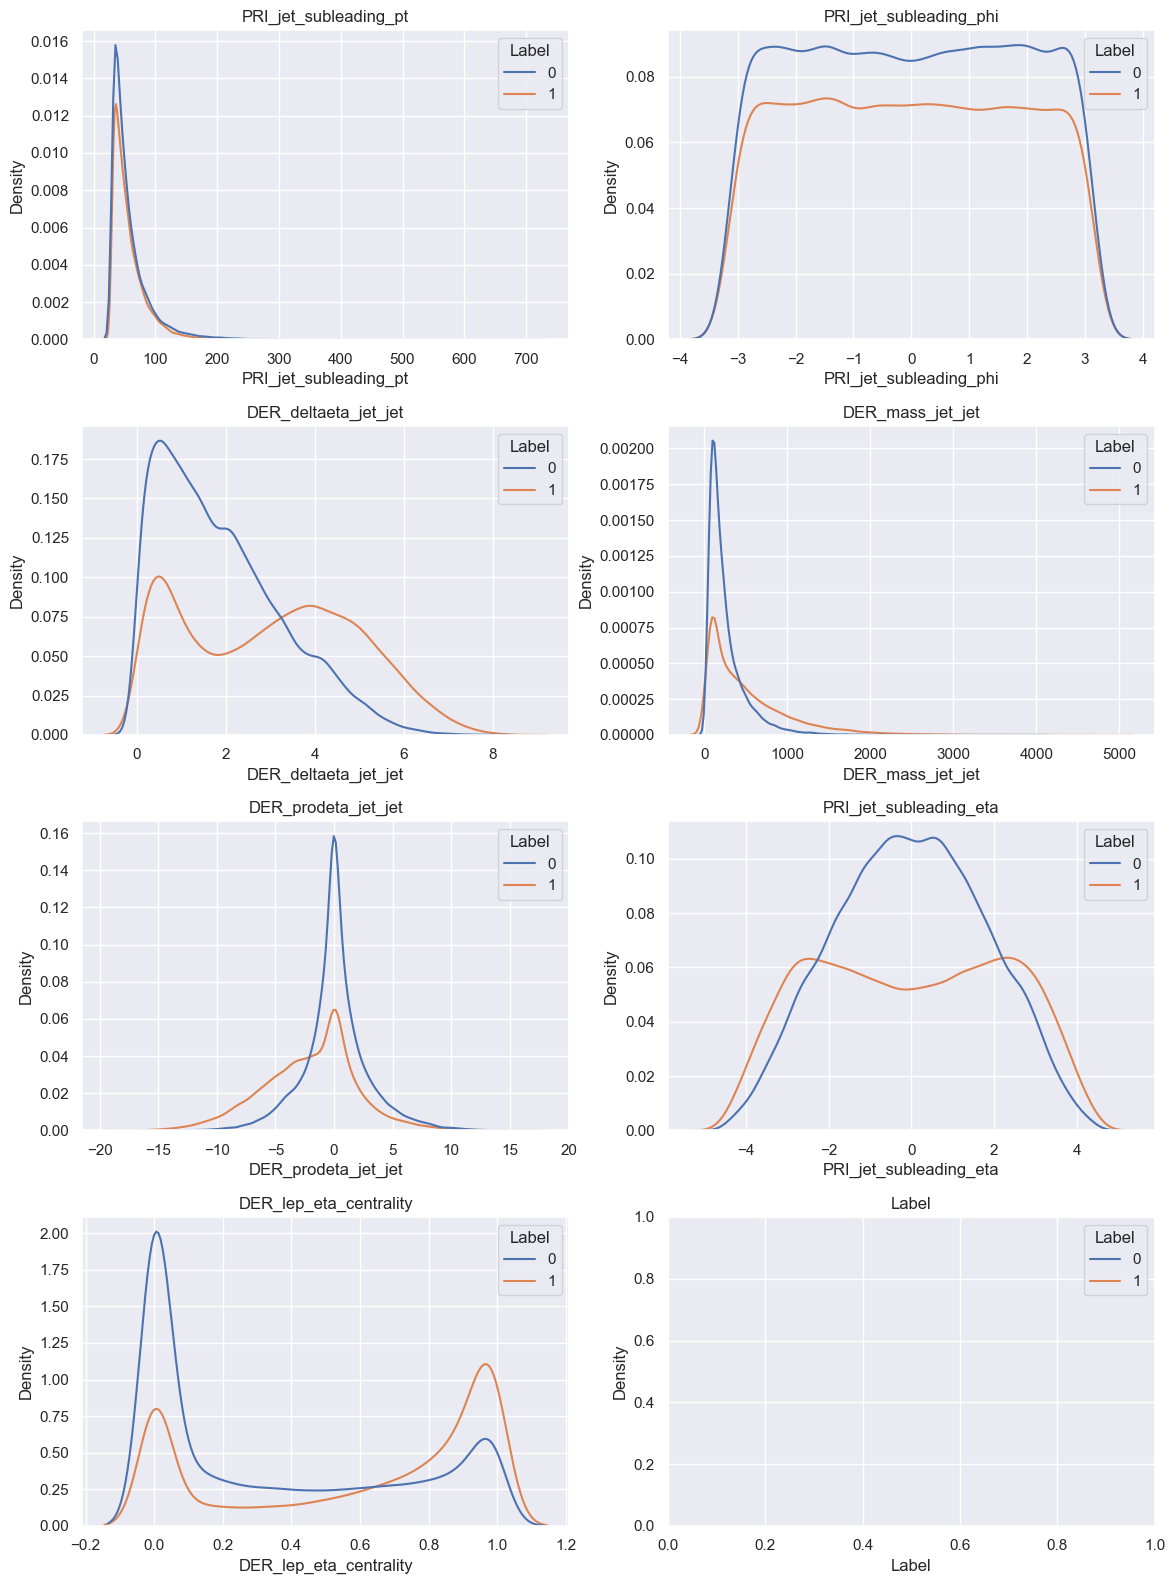

In [229]:
cols_to_check = ['PRI_jet_subleading_pt', 'PRI_jet_subleading_phi', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'PRI_jet_subleading_eta', 'DER_lep_eta_centrality', 'Label']
temp = data[cols_to_check].copy(deep=True)
temp.head(4)
temp['Label'] = temp['Label'].map({'b':0, 's':1})

fig, ax = plt.subplots(4,2, sharex=False, sharey=False, figsize=(4*3, 2*8))
for i,col in enumerate(cols_to_check):
    #print(col)
    
    sns.kdeplot(data=temp.replace(-999, np.nan), x=col, hue='Label', ax=ax[i // 2, i%2])
    ax[i // 2, i%2].set_title(col)
plt.tight_layout()
    
    

* prodeta_eta_jet_jet - has left tail extended for signal compared to background events
* However with 7-% missing values, imputation might not yield good results
* Drop the features with 70% missing values

In [231]:
cols_to_drop = ['PRI_jet_subleading_pt', 'PRI_jet_subleading_phi', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'PRI_jet_subleading_eta', 'DER_lep_eta_centrality']
print(len(cols_to_drop))

data.drop(cols_to_drop, axis=1, inplace=True)
print(data.shape)


7
(250000, 25)


In [233]:
missing_dict = find_999(data)
miss_df = pd.DataFrame([missing_dict]).T.reset_index().sort_values(by=0, ascending=False)
miss_df['perc'] = miss_df[0]/data.shape[0]
miss_df

index      0      perc
21          PRI_jet_leading_phi  99913  0.399652
20          PRI_jet_leading_eta  99913  0.399652
19           PRI_jet_leading_pt  99913  0.399652
0                  DER_mass_MMC  38114  0.152456
13                  PRI_lep_eta      0  0.000000
23                        Label      0  0.000000
22               PRI_jet_all_pt      0  0.000000
18                  PRI_jet_num      0  0.000000
17                PRI_met_sumet      0  0.000000
16                  PRI_met_phi      0  0.000000
15                      PRI_met      0  0.000000
14                  PRI_lep_phi      0  0.000000
12                   PRI_lep_pt      0  0.000000
1   DER_mass_transverse_met_lep      0  0.000000
11                  PRI_tau_phi      0  0.000000
10                  PRI_tau_eta      0  0.000000
9                    PRI_tau_pt      0  0.000000
8        DER_met_phi_centrality      0  0.000000
7          DER_pt_ratio_lep_tau      0  0.000000
6                    DER_sum_pt      0  0.000000
5                    DER_pt_tot      0  0.000000
4            DER_deltar_tau_lep      0  0.000000
3                      DER_pt_h      0  0.000000
2                  DER_mass_vis      0  0.000000
24                    Label_enc      0  0.000000

In [234]:
data_copy = data.copy(deep=True)

In [235]:
data = data.replace(-999, np.nan)
data.isnull().mean()

DER_mass_MMC                   0.152456
DER_mass_transverse_met_lep    0.000000
DER_mass_vis                   0.000000
DER_pt_h                       0.000000
DER_deltar_tau_lep             0.000000
DER_pt_tot                     0.000000
DER_sum_pt                     0.000000
DER_pt_ratio_lep_tau           0.000000
DER_met_phi_centrality         0.000000
PRI_tau_pt                     0.000000
PRI_tau_eta                    0.000000
PRI_tau_phi                    0.000000
PRI_lep_pt                     0.000000
PRI_lep_eta                    0.000000
PRI_lep_phi                    0.000000
PRI_met                        0.000000
PRI_met_phi                    0.000000
PRI_met_sumet                  0.000000
PRI_jet_num                    0.000000
PRI_jet_leading_pt             0.399652
PRI_jet_leading_eta            0.399652
PRI_jet_leading_phi            0.399652
PRI_jet_all_pt                 0.000000
Label                          0.000000
Label_enc                      0.000000


In [281]:
data['PRI_jet_leading_phi'] = data['PRI_jet_leading_phi'].fillna(data['PRI_jet_leading_phi'].mean())
data['PRI_jet_leading_eta'] = data['PRI_jet_leading_eta'].fillna(data['PRI_jet_leading_eta'].mean())
data['PRI_jet_leading_pt']  = data['PRI_jet_leading_pt'].fillna(data['PRI_jet_leading_pt'].mean())
data['DER_mass_MMC']        = data['DER_mass_MMC'].fillna(data['DER_mass_MMC'].mean())

Indepdendent features & depdendent features

In [282]:
X = data.drop(['Label', 'Label_enc'], axis=1)
Y = data['Label_enc']

print(X.shape, Y.shape)

(250000, 23) (250000,)


Train Test split

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1702)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(175000, 23) (175000,)
(75000, 23) (75000,)


In [284]:
print(y_train.value_counts(normalize=True))
print('\n')
print(y_test.value_counts(normalize=True))

0    0.657497
1    0.342503
Name: Label_enc, dtype: float64


0    0.656947
1    0.343053
Name: Label_enc, dtype: float64


- Before applying KNN imputer, features has to be scaled
- Apply robust scaler, so outliers will also be handled

In [285]:
rbscale = RobustScaler()
X_train_scaled = pd.DataFrame(rbscale.fit_transform(X_train), columns=X_train.columns)
X_train_scaled

X_test_scaled = pd.DataFrame(rbscale.transform(X_test), columns=X_test.columns)
X_test_scaled

DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0          0.067594                     0.359707      0.090904 -0.544828   
1          0.212305                    -0.666360      0.445289 -0.095058   
2          0.322668                    -0.109160      0.376757 -0.113808   
3         -1.148922                    -0.562862     -0.446812 -0.506731   
4         -0.895506                     0.162399     -0.243166  0.224502   
...             ...                          ...           ...       ...   
74995      0.054682                     1.018200     -1.286615 -0.036329   
74996     -0.543424                    -0.788224     -0.659656  1.319974   
74997      0.544368                    -0.761696      0.214017  1.262943   
74998      0.054682                     0.720040     -0.098244  0.151523   
74999      0.139034                    -0.615641      0.070862  2.470379   

       DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  DER_pt_ratio_lep_tau  \
0                0.559307   -0.373630   -0.423353              0.639509   
1                0.515152    0.814651   -0.313626             -0.675223   
2                0.767100    0.765114   -0.523478             -0.169643   
3                0.421645   -0.272979   -0.536043             -0.145089   
4                0.074459    0.334607   -0.153913              0.934152   
...                   ...         ...         ...                   ...   
74995           -1.078788    0.969813   -0.529265              0.440848   
74996           -0.986147   -0.420741    0.737721             -0.793527   
74997           -0.549784   -0.427615    0.785466             -0.322545   
74998           -0.179221    1.466113   -0.289420              1.543527   
74999           -0.953247   -0.463767    1.667214              0.937500   

       DER_met_phi_centrality  PRI_tau_pt  ...  PRI_lep_eta  PRI_lep_phi  \
0                   -0.381832   -0.376564  ...    -0.139665     0.030929   
1                   -0.339492    0.847233  ...    -0.043169    -0.539498   
2                    0.675520   -0.258604  ...    -0.088878    -0.130411   
3                   -0.409161   -0.306658  ...    -0.116303    -0.894061   
4                   -0.389915   -0.478442  ...    -0.623667    -0.092786   
...                       ...         ...  ...          ...          ...   
74995               -0.408391   -0.536566  ...     0.493652     0.491670   
74996                0.489222    1.130426  ...     0.365668     0.616022   
74997                0.485373    0.850264  ...    -0.127984    -0.707852   
74998               -0.404927   -0.416797  ...     0.603860     0.803826   
74999                0.571978    0.436205  ...    -0.028949    -0.599123   

        PRI_met  PRI_met_phi  PRI_met_sumet  PRI_jet_num  PRI_jet_leading_pt  \
0     -0.331961    -0.864666      -0.375496         -0.5            0.000000   
1      0.462501    -0.584424      -0.082848         -0.5            0.000000   
2     -0.445737    -0.689754      -0.181091         -0.5            0.000000   
3     -1.027082    -0.288222      -0.495142         -0.5            0.000000   
4      0.390916     0.348867      -0.023817          0.0           -1.878048   
...         ...          ...            ...          ...                 ...   
74995  1.519028    -0.286945      -0.109747         -0.5            0.000000   
74996  1.194269     0.677944       0.149477          0.0            1.489345   
74997  1.310964    -0.698372       0.456321          0.0            1.273314   
74998  0.480709     0.277370      -0.628791         -0.5            0.000000   
74999  2.129901    -0.607405       1.257781          0.0            4.173448   

       PRI_jet_leading_eta  PRI_jet_leading_phi  PRI_jet_all_pt  
0                 0.000000             0.000000       -0.368183  
1                 0.000000             0.000000       -0.368183  
2                 0.000000             0.000000       -0.368183  
3                 0.000000             0.000000       -

In [288]:
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier


def fit_model(X_train, y_train, X_test, y_test, **kwargs):
    
    scores = {}
    
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb_model = XGBClassifier()
        xgb_model.fit(X_train, y_train)
        y_pred = xgb_model.predict(X_test)
        
        print(f"XGB: Train score {accuracy_score(y_train, xgb_model.predict(X_train))}")
        print(f"XGB: Test  score {accuracy_score(y_test, y_pred)}")
        print(f"XGB: F1    score {f1_score(y_test, y_pred, average='weighted')}")
        print(f"Precision {precision_score(y_test, y_pred)}")
        print(f"Recall {recall_score(y_test, y_pred)}")        
        print(confusion_matrix(y_test, y_pred))
        
        print_metrics(y_test, y_pred)
        
        print('\n')
        
        scores['xgb'] = accuracy_score(y_test, y_pred)
        
    if 'gbm' in kwargs.keys() and kwargs['gbm']:
        gbm_model = GradientBoostingClassifier()
        gbm_model.fit(X_train, y_train)
        y_pred = gbm_model.predict(X_test)
        
        print(f"GBM: Train score {accuracy_score(y_train, gbm_model.predict(X_train))}")
        print(f"GBM: Test  score {accuracy_score(y_test, y_pred)}")
        print(f"GBM: F1    score {f1_score(y_test, y_pred, average='weighted')}")
        print(f"Precision {precision_score(y_test, y_pred)}")
        print(f"Recall {recall_score(y_test, y_pred)}")
        print(confusion_matrix(y_test, y_pred))
        print('\n')
        
        print_metrics(y_test, y_pred)
        
        scores['GBM'] = accuracy_score(y_test, y_pred)
        
    if 'logistic' in kwargs.keys() and kwargs['logistic']:
        log_model = LogisticRegression()
        log_model.fit(X_train, y_train)
        y_pred = log_model.predict(X_test)
        
        print(f"Log: Train score {accuracy_score(y_train, log_model.predict(X_train))}")
        print(f"Log: Test  score {accuracy_score(y_test, y_pred)}")
        print(f"Log: F1    score {f1_score(y_test, y_pred, average='weighted')}")
        print(f"Precision {precision_score(y_test, y_pred)}")
        print(f"Recall {recall_score(y_test, y_pred)}")        
        print(confusion_matrix(y_test, y_pred))
        print('\n')
        
        print_metrics(y_test, y_pred)
        
        scores['logistic'] = accuracy_score(y_test, y_pred)    
        
        
    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf_model = RandomForestClassifier()
        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)
        
        print(f"RF: Train score {accuracy_score(y_train, rf_model.predict(X_train))}")
        print(f"RF: Test  score {accuracy_score(y_test, y_pred)}")
        print(f"RF: F1    score {f1_score(y_test, y_pred, average='weighted')}")
        print(f"Precision {precision_score(y_test, y_pred)}")
        print(f"Recall {recall_score(y_test, y_pred)}")        
        print(confusion_matrix(y_test, y_pred))
        print('\n')
        
        print_metrics(y_test, y_pred)
        
        scores['rf'] = accuracy_score(y_test, y_pred)      
        
    if 'etc' in kwargs.keys() and kwargs['etc']:
        etc_model = RandomForestClassifier()
        etc_model.fit(X_train, y_train)
        y_pred = etc_model.predict(X_test)
        
        print(f"ETC: Train score {accuracy_score(y_train, etc_model.predict(X_train))}")
        print(f"ETC: Test  score {accuracy_score(y_test, y_pred)}")
        print(f"ETC: F1    score {f1_score(y_test, y_pred, average='weighted')}")
        print(f"Precision {precision_score(y_test, y_pred)}")
        print(f"Recall {recall_score(y_test, y_pred)}")        
        print(confusion_matrix(y_test, y_pred))
        print('\n')
        
        print_metrics(y_test, y_pred)
        
        scores['etc'] = accuracy_score(y_test, y_pred)              
        
    return scores  


def print_metrics(y_test, y_pred):
        
        conf_matrix = confusion_matrix(y_test, y_pred)
        print(conf_matrix)
        tp = conf_matrix[1,1]
        fn = conf_matrix[1,0]
        fp = conf_matrix[0,1]
        tn = conf_matrix[0,0]
        
        Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
        Precision =  (tp/(tp+fp))
        Recall    =  (tp/(tp+fn))
        F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

        show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]], columns=['Acc', 'Prec', 'Reca', 'F1'])
        show_metrics = show_metrics.T
        
        print(show_metrics)
        

In [289]:
fit_model(X_train, y_train, X_test, y_test, xgb=True, gbm=True, logistic=True, rf=True, etc=True)

[10:59:42] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB: Train score 0.8590057142857143
XGB: Test  score 0.837
XGB: F1    score 0.835381450198193
Precision 0.783816729718369
Recall 0.7247463951183489
[[44128  5143]
 [ 7082 18647]]
[[44128  5143]
 [ 7082 18647]]
             0
Acc   0.837000
Prec  0.783817
Reca  0.724746
F1    0.753125


GBM: Train score 0.8289885714285714
GBM: Test  score 0.8273466666666667
GBM: F1    score 0.8251445442247056
Precision 0.7742724697398918
Recall 0.7011154728127793
[[44012  5259]
 [ 7690 18039]]


[[44012  5259]
 [ 7690 18039]]
             0
Acc   0.827347
Prec  0.774272
Reca  0.701115
F1    0.735880
Log: Train score 0.7204628571428572
Log: Test  score 0.7201066666666667
Log: F1    s

{'xgb': 0.837,
 'GBM': 0.8273466666666667,
 'logistic': 0.7201066666666667,
 'rf': 0.8349733333333333,
 'etc': 0.83464}

Baseline XGB is doing good

Acc   0.837000 <br>
Prec  0.783817 <br>
Reca  0.724746 <br>
F1    0.753125 <br>

In [290]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f"RF: Train score {accuracy_score(y_train, rf_model.predict(X_train))}")
print(f"RF: Test  score {accuracy_score(y_test, y_pred)}")
print(f"RF: F1    score {f1_score(y_test, y_pred, average='micro')}")
print(f"Precision {precision_score(y_test, y_pred)}")
print(f"Recall {recall_score(y_test, y_pred)}") 
print(confusion_matrix(y_test, y_pred))
print('\n')

RF: Train score 0.9999714285714286
RF: Test  score 0.8344666666666667
RF: F1    score 0.8344666666666667
Precision 0.7924097338135817
Recall 0.7011543394613082
[[44545  4726]
 [ 7689 18040]]




In [291]:
rf_imp = dict(zip(X_train.columns, rf_model.feature_importances_))
rf_imp = pd.DataFrame.from_dict(rf_imp, orient ='index').reset_index()
rf_imp.sort_values(by=0, ascending=False)

index         0
0                  DER_mass_MMC  0.128358
1   DER_mass_transverse_met_lep  0.110750
2                  DER_mass_vis  0.087338
8        DER_met_phi_centrality  0.064707
9                    PRI_tau_pt  0.064665
4            DER_deltar_tau_lep  0.054124
7          DER_pt_ratio_lep_tau  0.047435
15                      PRI_met  0.047093
3                      DER_pt_h  0.037796
6                    DER_sum_pt  0.036016
5                    DER_pt_tot  0.033112
17                PRI_met_sumet  0.030811
12                   PRI_lep_pt  0.030111
13                  PRI_lep_eta  0.029416
10                  PRI_tau_eta  0.027685
20          PRI_jet_leading_eta  0.026876
14                  PRI_lep_phi  0.025691
11                  PRI_tau_phi  0.025553
16                  PRI_met_phi  0.025473
22               PRI_jet_all_pt  0.024121
19           PRI_jet_leading_pt  0.018879
21          PRI_jet_leading_phi  0.016766
18                  PRI_jet_num  0.007225

### Artifical Neural network

In [324]:
# Instantiate the Schema - Sequentail model - output from layer is input to another layer
model = Sequential()

#Input layer
model.add(tf.keras.layers.BatchNormalization(input_shape=(23,)))

#First hidden layer
model.add(tf.keras.layers.Dense(units=32, activation='relu'))

#Second hidden layer
model.add(tf.keras.layers.Dense(units=16, activation='relu'))

#third hidden layer
model.add(tf.keras.layers.Dense(units=8, activation='relu'))

#Output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [325]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_4 (Batc  (None, 23)               92        
 hNormalization)                                                 
                                                                 
 dense_16 (Dense)            (None, 32)                768       
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,533
Trainable params: 1,487
Non-trainable params: 46
___________________________________________________

In [326]:
metrics=[
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='ROC')
]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)

In [303]:
epoch_no = 50
train_model = model.fit(X_train, y_train,  epochs=epoch_no, verbose=2, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/50
5469/5469 - 16s - loss: 0.4295 - precision: 0.7400 - recall: 0.6475 - ROC: 0.8659 - val_loss: 0.4036 - val_precision: 0.7244 - val_recall: 0.7680 - val_ROC: 0.8916 - 16s/epoch - 3ms/step
Epoch 2/50
5469/5469 - 12s - loss: 0.4077 - precision: 0.7571 - recall: 0.6704 - ROC: 0.8801 - val_loss: 0.3818 - val_precision: 0.7864 - val_recall: 0.6882 - val_ROC: 0.8971 - 12s/epoch - 2ms/step
Epoch 3/50
5469/5469 - 11s - loss: 0.4042 - precision: 0.7581 - recall: 0.6761 - ROC: 0.8826 - val_loss: 0.3866 - val_precision: 0.7455 - val_recall: 0.7466 - val_ROC: 0.8951 - 11s/epoch - 2ms/step
Epoch 4/50
5469/5469 - 11s - loss: 0.4004 - precision: 0.7618 - recall: 0.6808 - ROC: 0.8847 - val_loss: 0.3822 - val_precision: 0.7461 - val_recall: 0.7611 - val_ROC: 0.9006 - 11s/epoch - 2ms/step
Epoch 5/50
5469/5469 - 11s - loss: 0.3979 - precision: 0.7614 - recall: 0.6847 - ROC: 0.8864 - val_loss: 0.3780 - val_precision: 0.7646 - val_recall: 0.7386 - val_ROC: 0.9009 - 11s/epoch - 2ms/step
Epoch 6/50

In [304]:
y_pred = model.predict(X_test)
y_pred = y_pred.round()

print_metrics(y_test, y_pred)

2344/2344 [==============================] - 2s 1ms/step
[[42733  6538]
 [ 5981 19748]]
             0
Acc   0.833080
Prec  0.751274
Reca  0.767539
F1    0.759319


F1 score is very slightly improved compared to XGB baseline model

In [306]:
train_model.history.keys()

dict_keys(['loss', 'precision', 'recall', 'ROC', 'val_loss', 'val_precision', 'val_recall', 'val_ROC'])

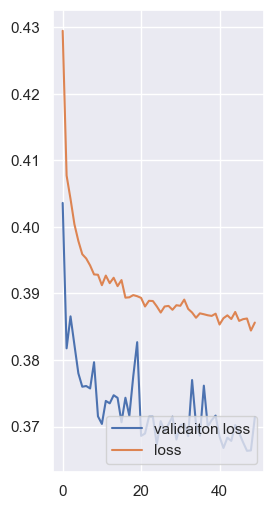

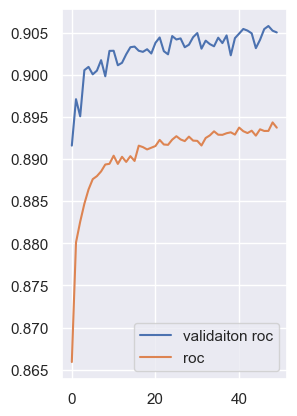

In [305]:
loss     = train_model.history['loss']
val_loss = train_model.history['val_loss']

roc = train_model.history['ROC']
val_roc = train_model.history['val_ROC']

epochs_range = range(epoch_no)

plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.plot(epochs_range, val_loss, label='validaiton loss')
plt.plot(epochs_range, loss, label='loss')
plt.legend(loc='lower right')
plt.show()

plt.subplot(1,2,2)
plt.plot(epochs_range, val_roc, label='validaiton roc')
plt.plot(epochs_range, roc, label='roc')
plt.legend(loc='lower right')
plt.show()

Use callbacks

In [327]:
early_stop = tf.keras.callbacks.EarlyStopping(
                monitor="val_loss",
                min_delta=0.001,
                patience=15,
                verbose=1,
                mode="auto",
                baseline=None,
                restore_best_weights=False,
            )

tb = tf.keras.callbacks.TensorBoard(
        log_dir="logs",
        histogram_freq=0,
        write_graph=True,
        write_images=False,
        write_steps_per_second=False,
        update_freq="epoch",
        profile_batch=0,
        embeddings_freq=0,
        embeddings_metadata=None
    )

lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=10,
    verbose=0,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0
)

In [328]:
epoch_no = 100
train_model = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[early_stop, tb, lr], verbose=2, epochs=epoch_no, batch_size=32)

Epoch 1/100
5469/5469 - 12s - loss: 0.4286 - precision: 0.7394 - recall: 0.6417 - ROC: 0.8660 - val_loss: 0.3915 - val_precision: 0.7364 - val_recall: 0.7539 - val_ROC: 0.8927 - lr: 0.0010 - 12s/epoch - 2ms/step
Epoch 2/100
5469/5469 - 12s - loss: 0.4063 - precision: 0.7565 - recall: 0.6735 - ROC: 0.8809 - val_loss: 0.3781 - val_precision: 0.7736 - val_recall: 0.7139 - val_ROC: 0.8988 - lr: 0.0010 - 12s/epoch - 2ms/step
Epoch 3/100
5469/5469 - 15s - loss: 0.4038 - precision: 0.7555 - recall: 0.6777 - ROC: 0.8824 - val_loss: 0.3794 - val_precision: 0.7724 - val_recall: 0.7166 - val_ROC: 0.8992 - lr: 0.0010 - 15s/epoch - 3ms/step
Epoch 4/100
5469/5469 - 17s - loss: 0.4016 - precision: 0.7598 - recall: 0.6810 - ROC: 0.8839 - val_loss: 0.3786 - val_precision: 0.7723 - val_recall: 0.7240 - val_ROC: 0.9001 - lr: 0.0010 - 17s/epoch - 3ms/step
Epoch 5/100
5469/5469 - 13s - loss: 0.3987 - precision: 0.7615 - recall: 0.6858 - ROC: 0.8858 - val_loss: 0.3762 - val_precision: 0.7797 - val_recall: 0

In [329]:
y_pred = model.predict(X_test)
y_pred = y_pred.round()

print_metrics(y_test, y_pred)

2344/2344 [==============================] - 3s 1ms/step
[[43435  5836]
 [ 6477 19252]]
             0
Acc   0.835827
Prec  0.767379
Reca  0.748261
F1    0.757699


In [331]:
train_model.history.keys()

dict_keys(['loss', 'precision', 'recall', 'ROC', 'val_loss', 'val_precision', 'val_recall', 'val_ROC', 'lr'])

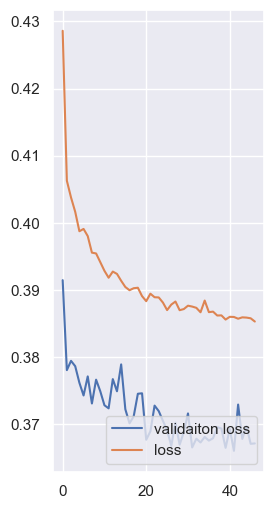

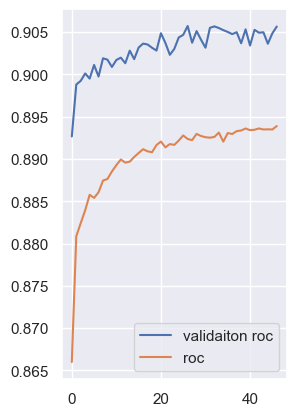

In [332]:
loss     = train_model.history['loss']
val_loss = train_model.history['val_loss']

roc = train_model.history['ROC']
val_roc = train_model.history['val_ROC']

epochs_range = range(47)

plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.plot(epochs_range, val_loss, label='validaiton loss')
plt.plot(epochs_range, loss, label='loss')
plt.legend(loc='lower right')
plt.show()

plt.subplot(1,2,2)
plt.plot(epochs_range, val_roc, label='validaiton roc')
plt.plot(epochs_range, roc, label='roc')
plt.legend(loc='lower right')
plt.show()

Looks to be stable model, <br>
Acc   0.835827 <br>
Prec  0.767379 <br>
Reca  0.748261 <br>
F1    0.757699 <br>